In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('../data/Anonymize_Loan_Default_data.csv', encoding='unicode_escape')
# display un-truncated columns when calling upon dataframe
pd.set_option('display.max_columns', None)

In [4]:
df_wrangled = df.copy()

# Dropping "Unnamed: 0" column
df_wrangled = df_wrangled.drop('Unnamed: 0', axis=1)

# Dropping rows: 'loan_amnt' = 0  & 'int_rate > 100'
zero_loan_amnt = set(df_wrangled.query('loan_amnt == 0').index)
large_int_rate = set(df_wrangled.query('int_rate > 100').index)
drop_rows = list(zero_loan_amnt.union(large_int_rate))
df_wrangled.drop(drop_rows, axis=0, inplace=True)

# Change id and member_id to strings
df_wrangled.id = df_wrangled.id.astype(str)
df_wrangled.member_id = df_wrangled.member_id.astype(str)

# Proportion of funded amount paid
df_wrangled['prop_funded_amnt_paid'] = df_wrangled['total_pymnt'] / df_wrangled['funded_amnt'] 

In [290]:
df_wrangled

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail,prop_funded_amnt_paid
1,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,Aug-05,5.0,NaN,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0,1.230117
2,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,Apr-94,1.0,59.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1,0.589752
3,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Sep-11,Fully Paid,other,751xx,TX,10.80,3.0,Mar-98,3.0,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0,1.154627
4,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,Jan-75,0.0,72.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0,1.080832
5,506439,652909,3600.0,3600.0,3600.00000,36 months,10.25,116.59,10+ years,MORTGAGE,675048.0,Not Verified,Apr-10,Does not meet the credit policy. Status:Fully ...,other,352xx,AL,1.55,0.0,Apr-98,4.0,25.0,8.0,0.0,0.0,0%,25.0,4206.031191,4206.03,3600.00,606.03,May-13,146.75,Jun-13,Jun-16,0,1.168342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,849205,1060907,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,Aug-11,Fully Paid,credit_card,805xx,CO,22.17,0.0,Jan-00,2.0,NaN,12.0,0.0,16550.0,73.50%,22.0,3586.619764,3586.62,3000.00,586.62,Aug-14,100.30,NaN,Jun-16,0,1.195540
38476,852914,1065048,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,Aug-11,Fully Paid,credit_card,442xx,OH,11.57,0.0,Apr-99,1.0,NaN,21.0,0.0,16898.0,39.70%,33.0,12703.534030,12703.53,10400.00,2303.53,Sep-14,393.08,NaN,Jun-16,0,1.221494
38477,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,May-10,Fully Paid,debt_consolidation,073xx,NJ,10.63,0.0,Dec-95,1.0,NaN,9.0,1.0,10386.0,62.20%,25.0,14202.267530,14163.31,10550.00,3652.27,Jun-13,5439.96,NaN,Feb-16,0,1.346186
38478,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,Jul-11,Fully Paid,debt_consolidation,061xx,CT,18.97,0.0,Jul-07,2.0,NaN,8.0,0.0,7301.0,53.30%,12.0,12815.178320,12815.18,10000.00,2815.18,Aug-14,380.63,NaN,Sep-15,0,1.281518


In [128]:
df_wrangled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38478 non-null  object 
 1   member_id               38478 non-null  object 
 2   loan_amnt               38478 non-null  float64
 3   funded_amnt             38478 non-null  float64
 4   funded_amnt_inv         38478 non-null  float64
 5   term                    38478 non-null  object 
 6   int_rate                38478 non-null  float64
 7   installment             38478 non-null  float64
 8   emp_length              37485 non-null  object 
 9   home_ownership          38478 non-null  object 
 10  annual_inc              38477 non-null  float64
 11  verification_status     38478 non-null  object 
 12  issue_d                 38478 non-null  object 
 13  loan_status             38478 non-null  object 
 14  purpose                 38478 non-null  obj

## Analysis

In [294]:
data_repay_fail.loan_status.unique()

array(['Charged Off',
       'Does not meet the credit policy. Status:Charged Off',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

Loan Status Description:
- **Fully Paid** Loan has been fully paid off.
- **Charged Off** Loan for which there is no longer a reasonable expectation of further payments (i.e. no chance of being repaid).
- **Does not meet the credit policy. Status:Fully Paid** While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn’t be approved on to the marketplace.
- **Does not meet the credit policy. Status:Charged Off** While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn’t be approved on to the marketplace.
- **Current** Loan is up to date on current payments.
- **In Grace Period** The loan is past due but still in the grace period of 15 days.
- **Late (31-120 days)** Loan hasn’t been paid in 31 to 120 days (late on the current payment).
- **Late (16-30 days)** Loan hasn’t been paid in 16 to 30 days (late on the current payment).
- **Default** Loan is defaulted on and no payment has been made for more than 121 days.

In [5]:
df_wrangled.repay_fail.value_counts()

repay_fail
0    32650
1     5828
Name: count, dtype: int64

What I want to look at:
- breakdown of repay_fail vs...
    - loan amount
    - purpose
    

In [129]:
#Subsetting data into 2 subsets: Repayed and Failed to Repay
data_repayed = df_wrangled.query('repay_fail == 0')
data_repay_fail = df_wrangled.query('repay_fail == 1')

In [130]:
# List of numeric columns from dataframe
numeric_cols = df_wrangled.select_dtypes(include = [int, float]).columns

In [268]:
def hist_vs_repay(col, repayed_df, repay_fail_df):
    plt.figure(figsize = [13, 3])
    
    plt.subplot(1, 2, 1)
    plt.hist(data = repayed_df, x = col, weights = np.ones_like(repayed_df[col]) / len(repayed_df[col]))
    plt.xlabel(col)
    plt.title('Repayed Loans')
    
    plt.subplot(1, 2, 2)
    plt.hist(data = repay_fail_df, x = col, weights=np.ones_like(repay_fail_df[col]) / len(repay_fail_df[col]))
    plt.xlabel(col)
    plt.title('Defaulted Loans')

/var/folders/rm/xhgtywsd46g95m0kk2g9t5qr0000gn/T/ipykernel_18989/1025704970.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = [13, 3])


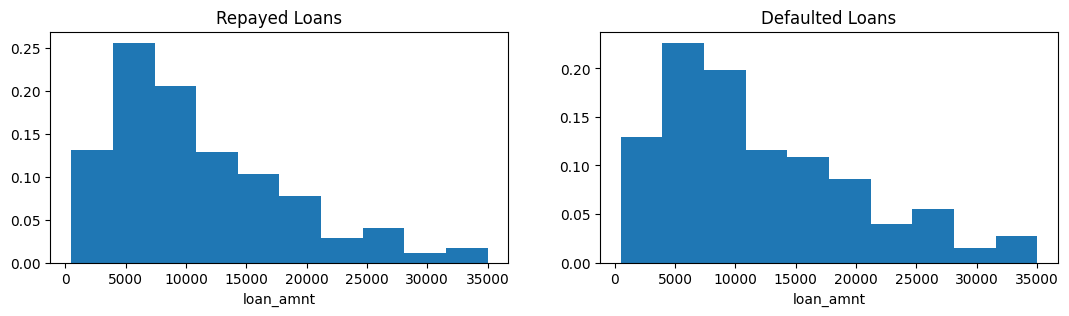

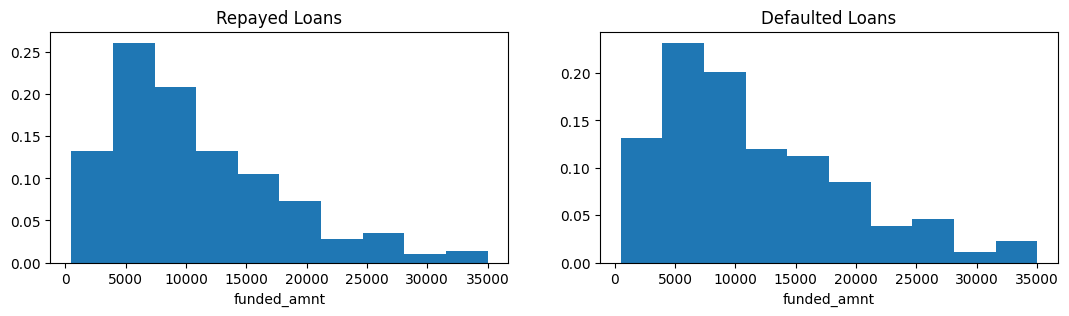

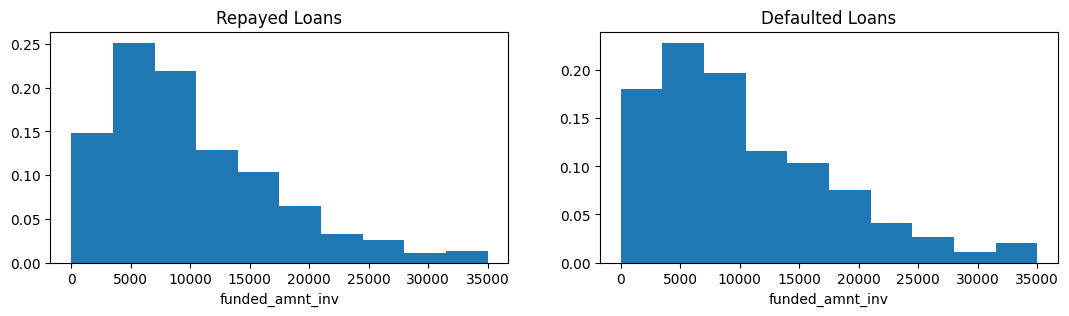

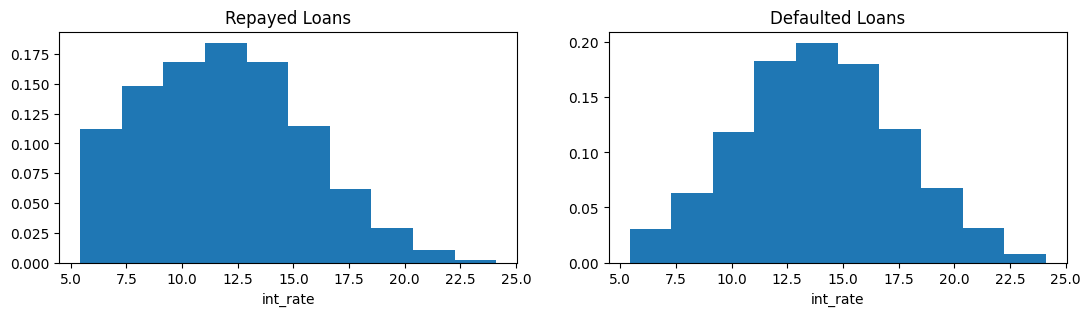

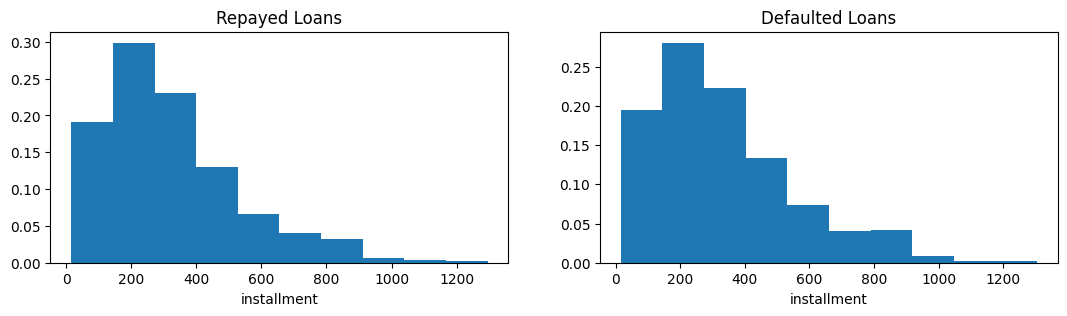

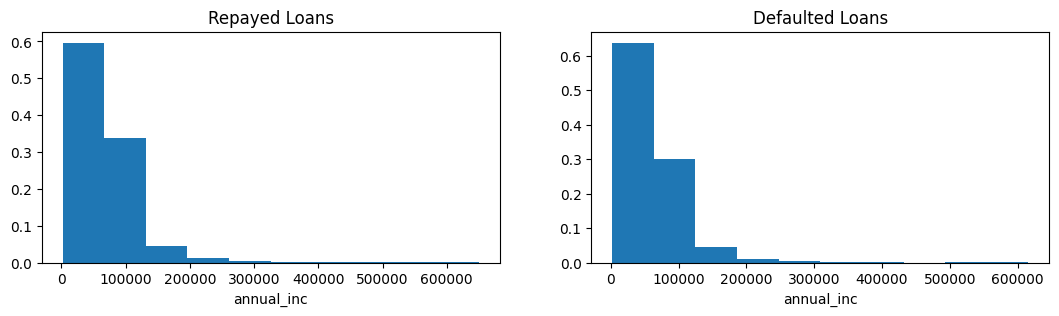

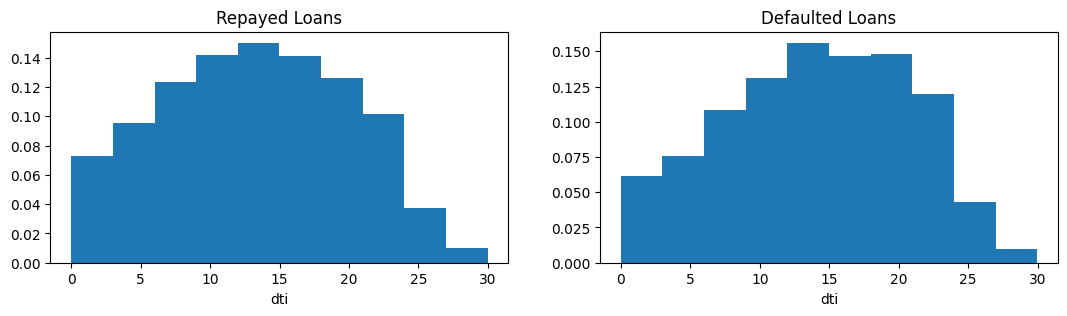

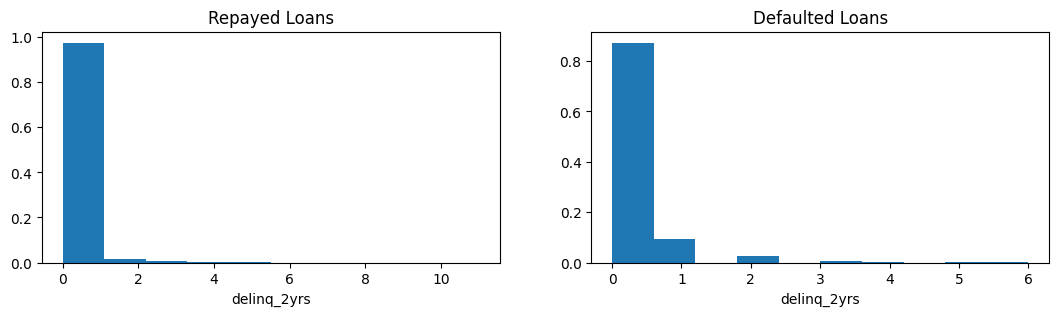

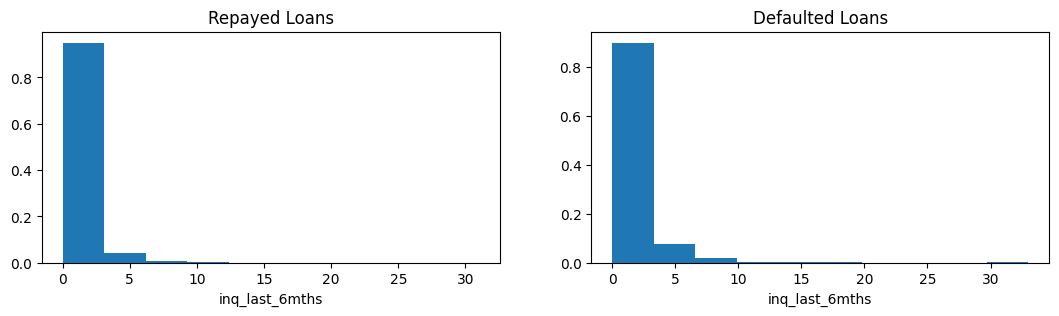

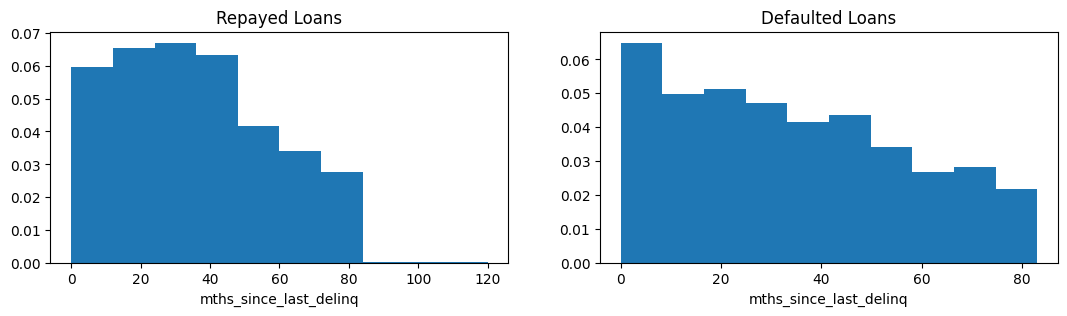

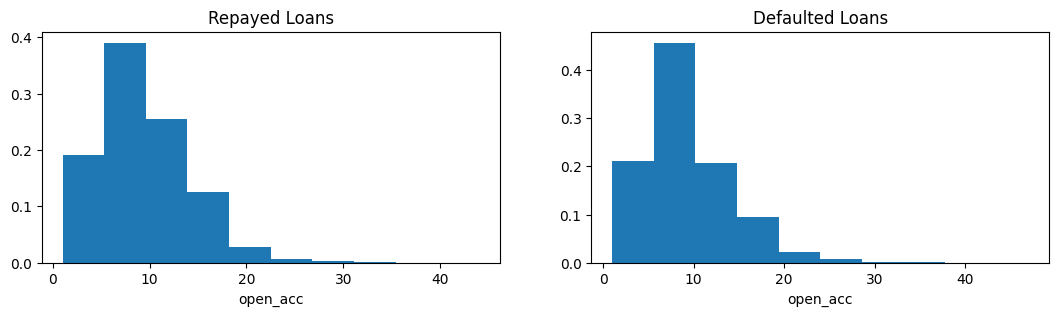

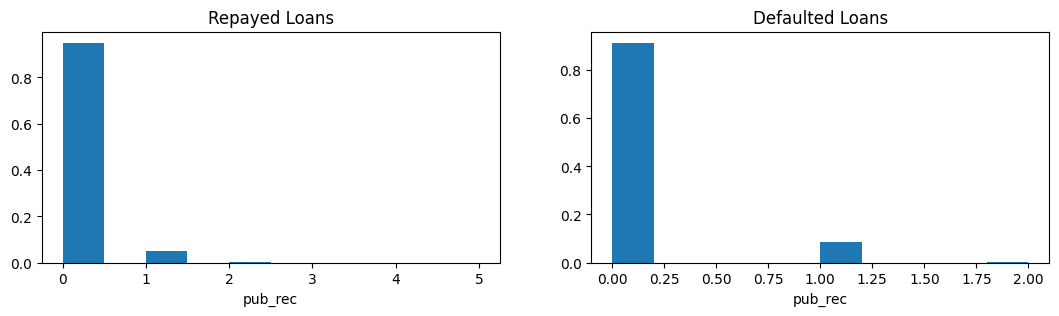

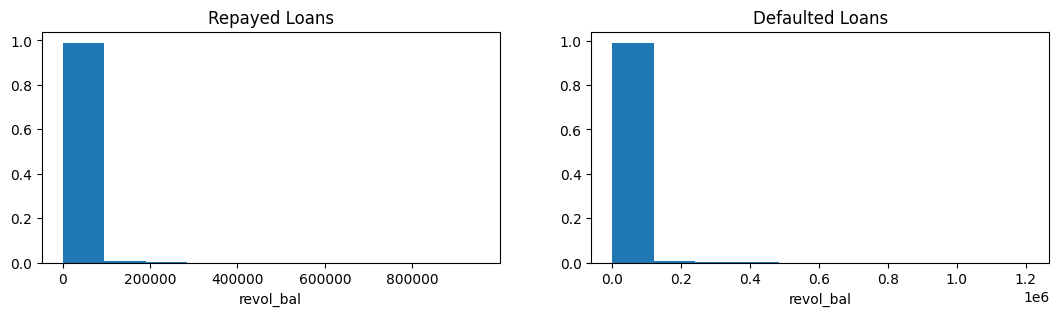

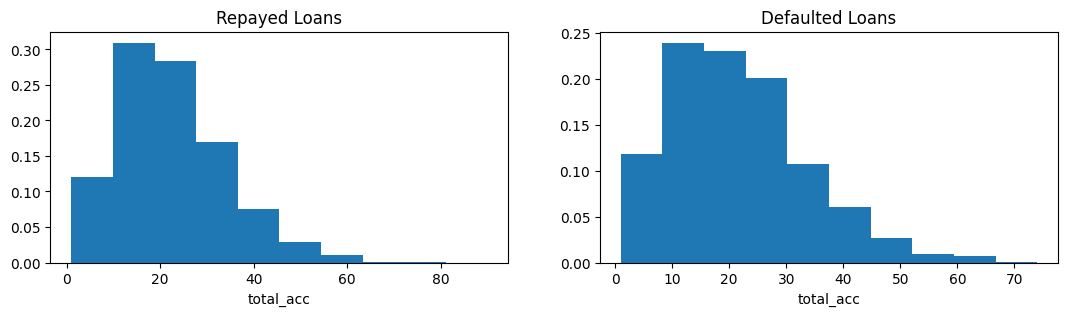

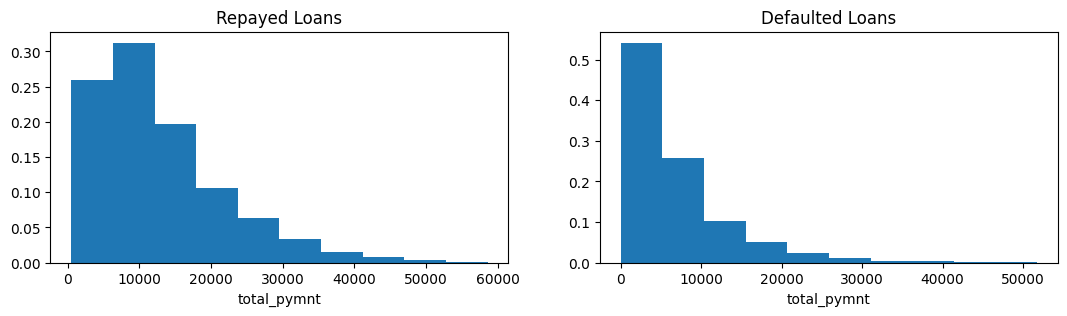

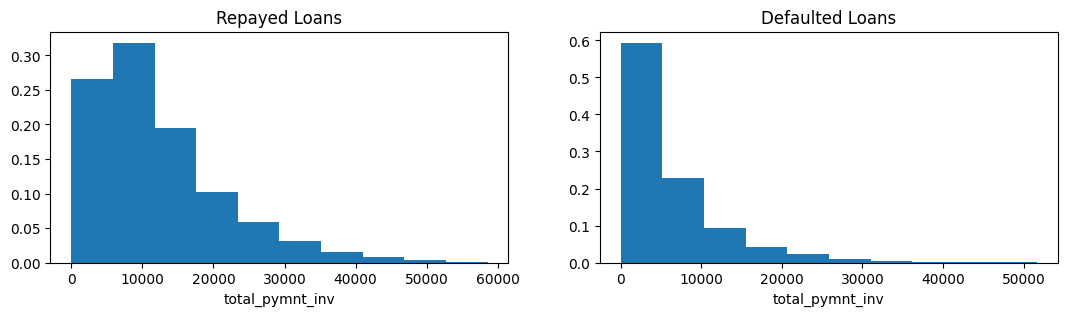

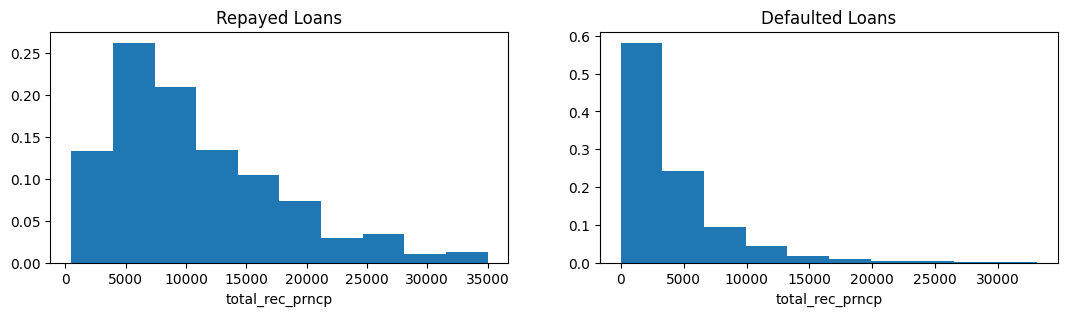

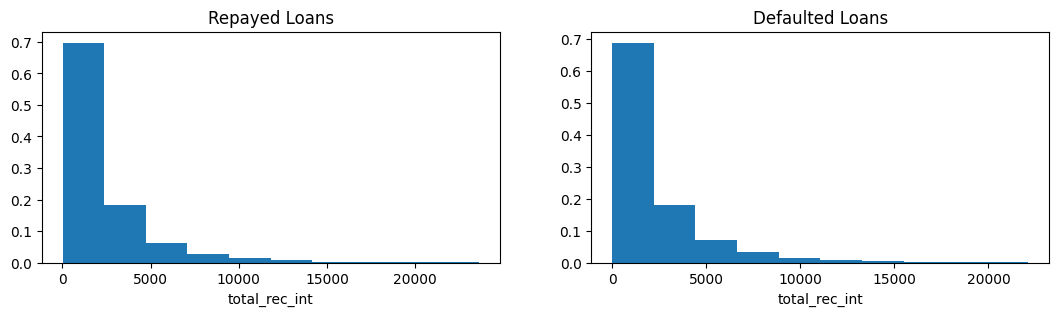

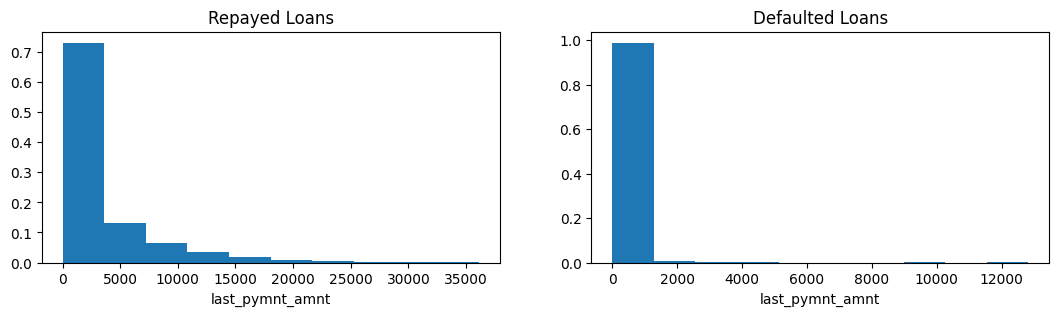

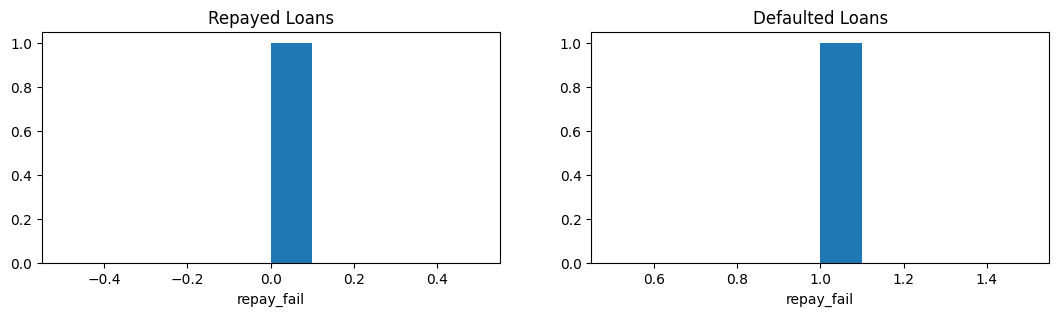

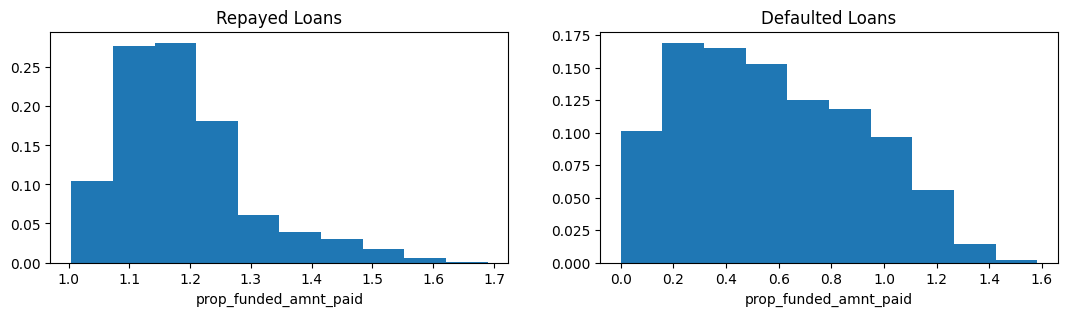

In [269]:
for i in numeric_cols:
    hist_vs_repay(i, data_repayed.query('annual_inc <= 650000'), data_repay_fail.query('annual_inc <= 650000'))

In [42]:
data_repayed.int_rate.describe()

count    32650.000000
mean        11.846976
std          3.646237
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         24.110000
Name: int_rate, dtype: float64

In [41]:
data_repay_fail.int_rate.describe()

count    5828.000000
mean       13.928878
std         3.562431
min         5.420000
25%        11.490000
50%        13.850000
75%        16.400000
max        24.110000
Name: int_rate, dtype: float64

#### Repayment of Loans vs Interest Rates
The loans that have NOT been repayed generally have higher interest rates that those that have. 
Although they have the same range of interest rates, the loans that have been repayed have a average rate of 11.85%, a median rate of 11.71% and are skewed to the right (i.e. majority of the interest rate are lie on the lower end). THe loans that have NOT been repayed have an average rate of 13.93%, a median rate of 13.85% and appear to be normally distributed.

In [43]:
df_wrangled[df_wrangled.columns[0:19]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38478 non-null  int64  
 1   member_id            38478 non-null  int64  
 2   loan_amnt            38478 non-null  float64
 3   funded_amnt          38478 non-null  float64
 4   funded_amnt_inv      38478 non-null  float64
 5   term                 38478 non-null  object 
 6   int_rate             38478 non-null  float64
 7   installment          38478 non-null  float64
 8   emp_length           37485 non-null  object 
 9   home_ownership       38478 non-null  object 
 10  annual_inc           38477 non-null  float64
 11  verification_status  38478 non-null  object 
 12  issue_d              38478 non-null  object 
 13  loan_status          38478 non-null  object 
 14  purpose              38478 non-null  object 
 15  zip_code             38478 non-null  obje

### What do I think may correlate to loan default?
>By itself:
- int_rate
- annual_inc
- dti
- pub_rec (number of degogatory marks)
- zip_code?

>With segmentation:
- loan_amnt/funded_amnt
- installment
- annual_inc
- purpose

In [291]:
df_wrangled[df_wrangled.columns[19:]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   earliest_cr_line        38478 non-null  object 
 1   inq_last_6mths          38478 non-null  float64
 2   mths_since_last_delinq  14116 non-null  float64
 3   open_acc                38478 non-null  float64
 4   pub_rec                 38478 non-null  float64
 5   revol_bal               38475 non-null  float64
 6   revol_util              38419 non-null  object 
 7   total_acc               38478 non-null  float64
 8   total_pymnt             38478 non-null  float64
 9   total_pymnt_inv         38478 non-null  float64
 10  total_rec_prncp         38478 non-null  float64
 11  total_rec_int           38478 non-null  float64
 12  last_pymnt_d            38407 non-null  object 
 13  last_pymnt_amnt         38478 non-null  float64
 14  next_pymnt_d            3381 non-null   obj

In [293]:
df_wrangled.head(15)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail,prop_funded_amnt_paid
1,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,Aug-05,5.0,NaN,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0,1.230117
2,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,Apr-94,1.0,59.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1,0.589752
3,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Sep-11,Fully Paid,other,751xx,TX,10.80,3.0,Mar-98,3.0,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0,1.154627
4,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,Jan-75,0.0,72.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0,1.080832
5,506439,652909,3600.0,3600.0,3600.00000,36 months,10.25,116.59,10+ years,MORTGAGE,675048.0,Not Verified,Apr-10,Does not meet the credit policy. Status:Fully ...,other,352xx,AL,1.55,0.0,Apr-98,4.0,25.0,8.0,0.0,0.0,0%,25.0,4206.031191,4206.03,3600.00,606.03,May-13,146.75,Jun-13,Jun-16,0,1.168342
6,981465,1204637,8000.0,8000.0,8000.00000,36 months,6.03,243.49,NaN,MORTGAGE,77736.0,Verified,Oct-11,Fully Paid,other,853xx,AZ,6.07,0.0,Jul-96,0.0,NaN,12.0,0.0,4182.0,13.60%,49.0,8724.971815,8724.97,8000.00,724.97,Apr-14,1423.66,NaN,Apr-14,0,1.090621
7,749050,948200,6000.0,6000.0,6000.00000,36 months,7.49,186.61,3 years,RENT,35000.0,Not Verified,May-11,Fully Paid,debt_consolidation,658xx,MO,13.13,0.0,Oct-03,0.0,NaN,5.0,0.0,5864.0,47.70%,9.0,6717.950109,6717.95,6000.00,717.95,May-14,211.41,NaN,May-14,0,1.119658
8,1016373,1243872,25600.0,25600.0,25472.82947,60 months,14.27,599.26,4 years,RENT,86000.0,Verified,Nov-11,Fully Paid,debt_consolidation,105xx,NY,26.51,0.0,Oct-83,1.0,NaN,16.0,0.0,33021.0,70.80%,32.0,32840.056740,32659.13,25600.00,7240.06,Apr-14,16083.78,NaN,Jun-16,0,1.282815
9,786870,990345,19750.0,19750.0,19750.00000,60 months,23.22,559.27,10+ years,MORTGAGE,72500.0,Verified,Jun-11,Fully Paid,debt_consolidation,630xx,MO,19.96,0.0,Mar-92,0.0,61.0,15.0,0.0,21544.0,98.70%,44.0,27544.891160,27544.89,19750.00,7794.89,Jun-13,15264.34,NaN,Feb-16,0,1.394678
10,1019261,1247939,6250.0,6250.0,6250.00000,36 months,17.27,223.68,4 years,MORTGAGE,28000.0,Verified,Nov-11,Charged Off,other,450xx,OH,13.76,0.0,Oct-99,0.0,41.0,2.0,1.0,0.0,8.46%,15.0,6688.640000,6688.64,4764.18,1713.09,Apr-14,223.68,NaN,Sep-14,1,1.070182


In [265]:
def kdeplot_vs_repay(col, df1, df2):
    sns.kdeplot(data= df1, x=col, color='red', alpha=0.5, common_grid = True, fill = True)
    sns.kdeplot(data=df2, x=col, color='blue', alpha=0.5, common_grid = True, fill = True)
    plt.legend(labels=['repayed', 'failed to repay'])
    plt.show()

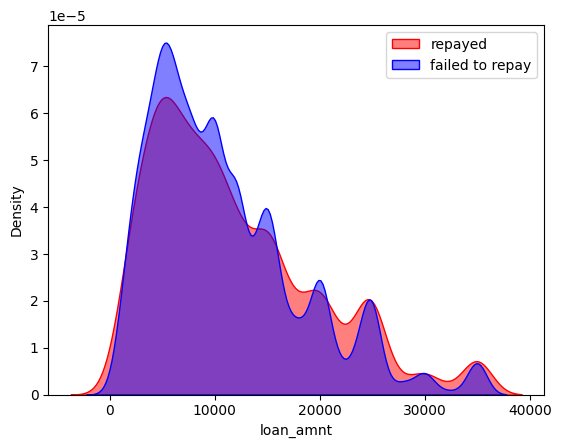

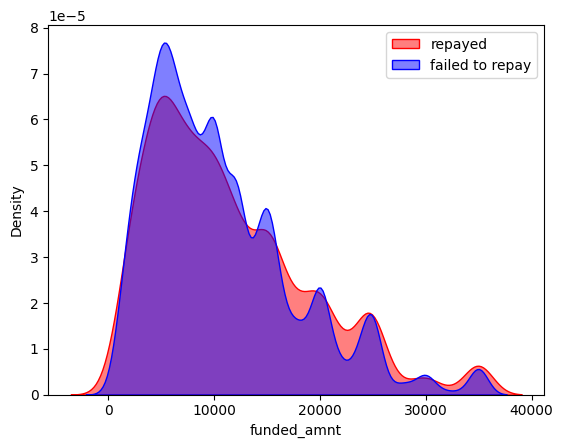

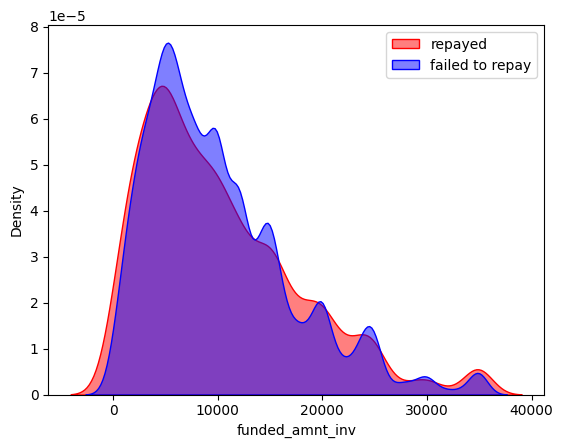

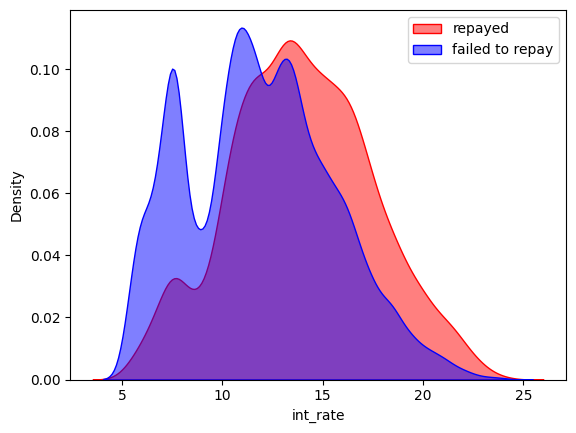

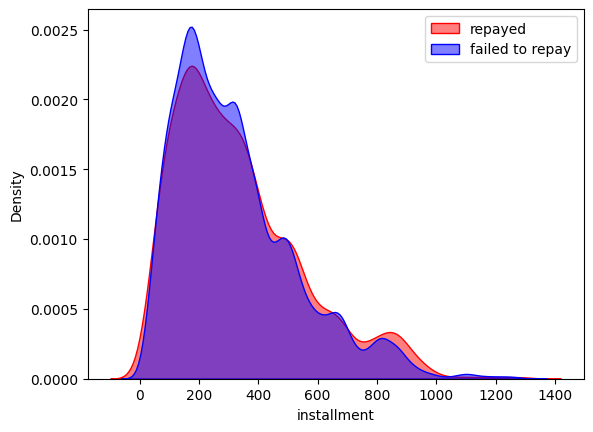

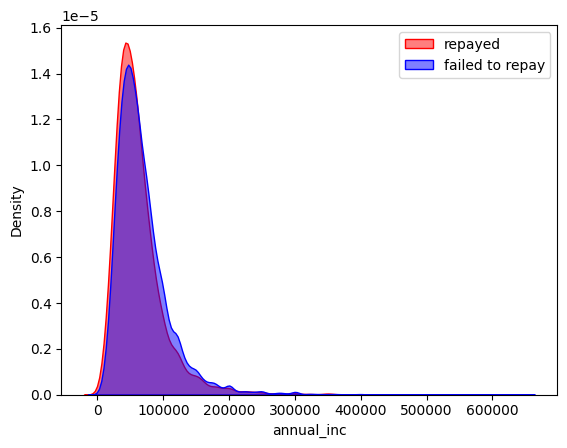

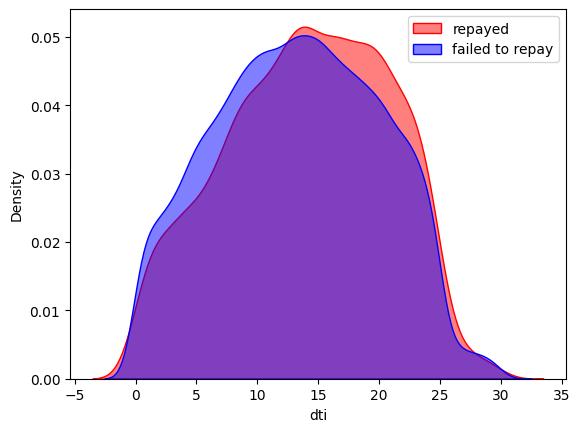

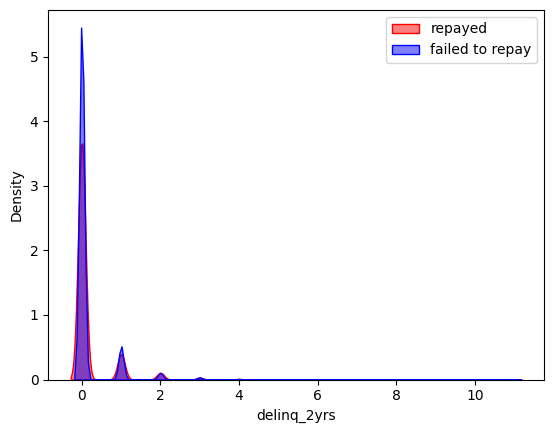

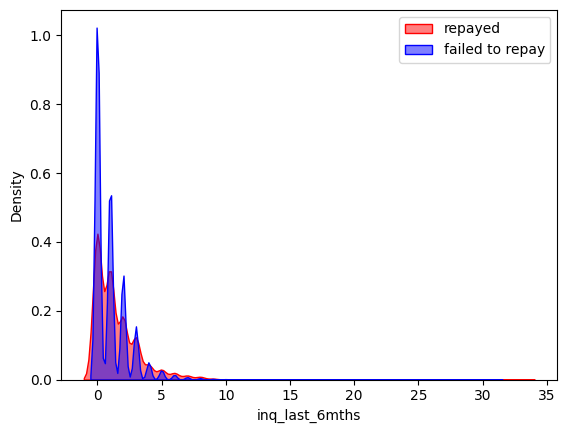

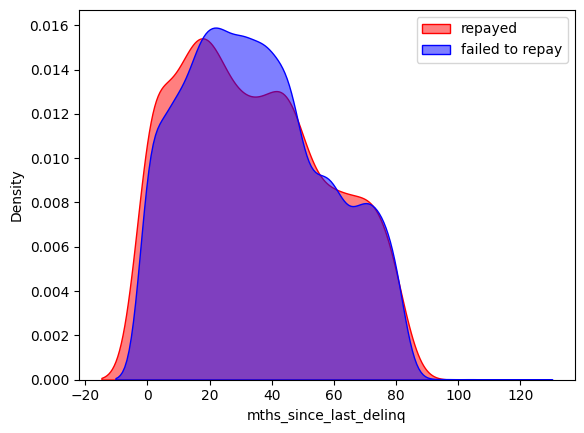

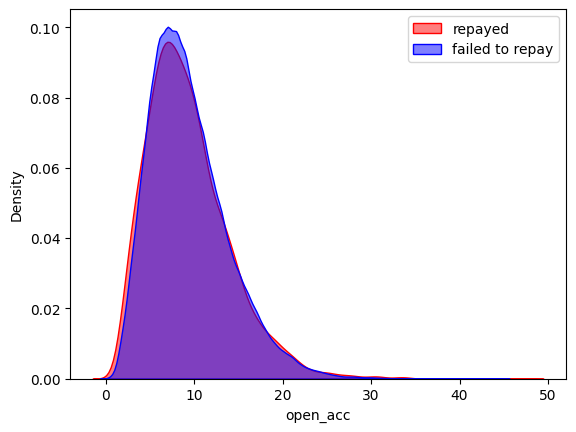

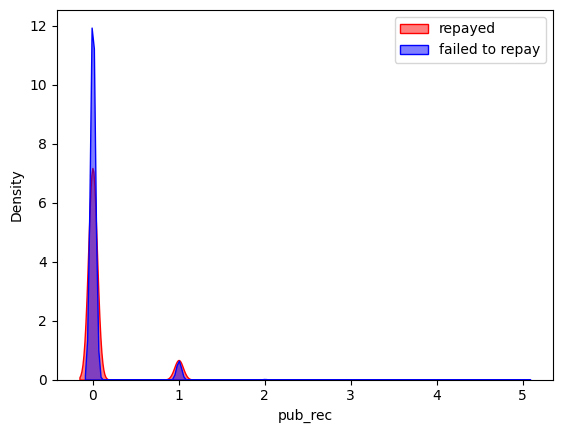

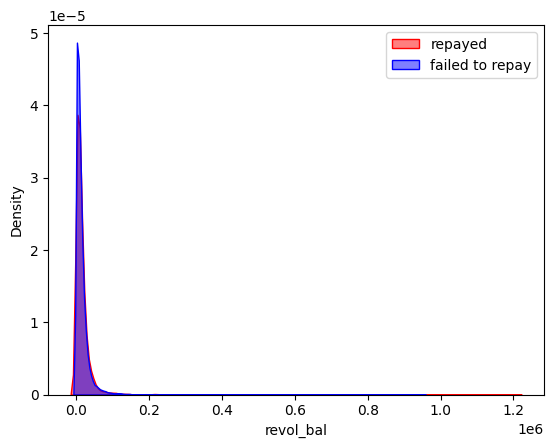

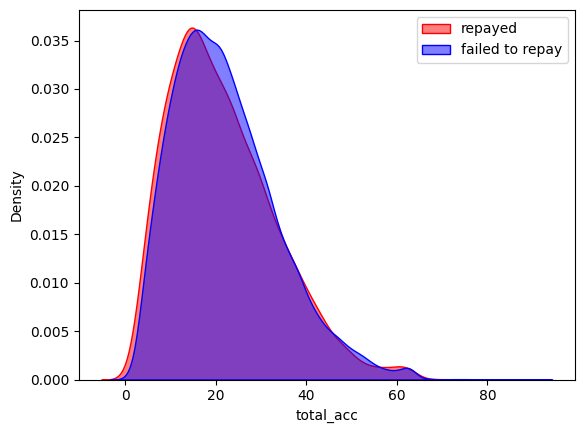

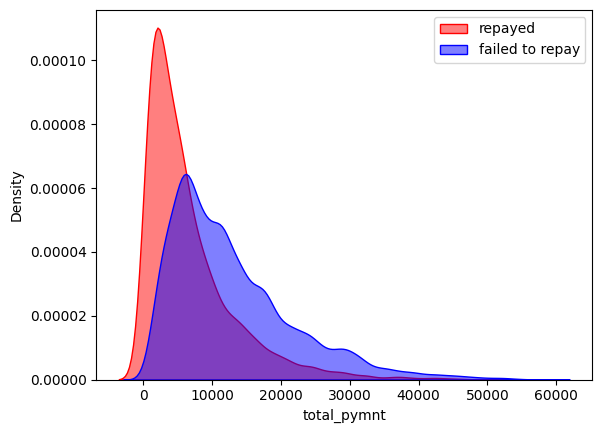

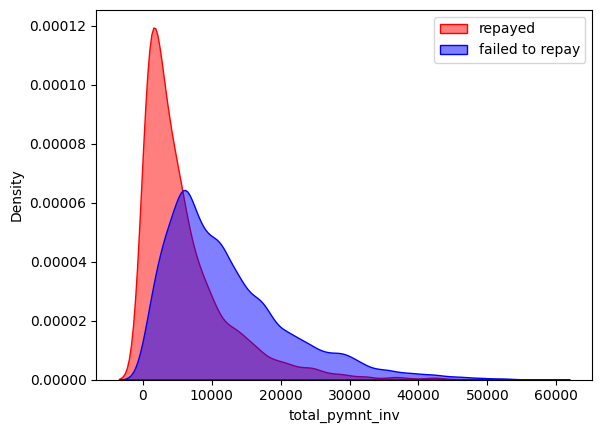

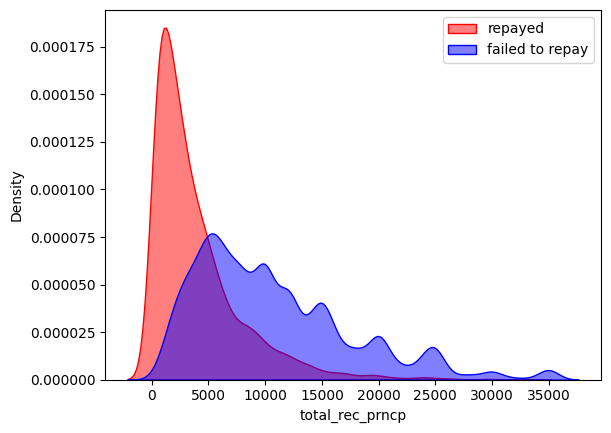

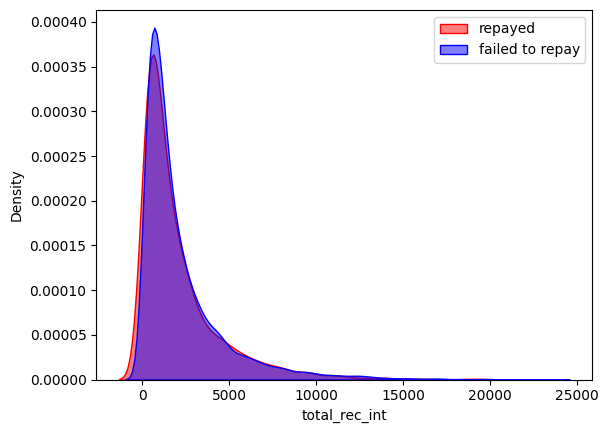

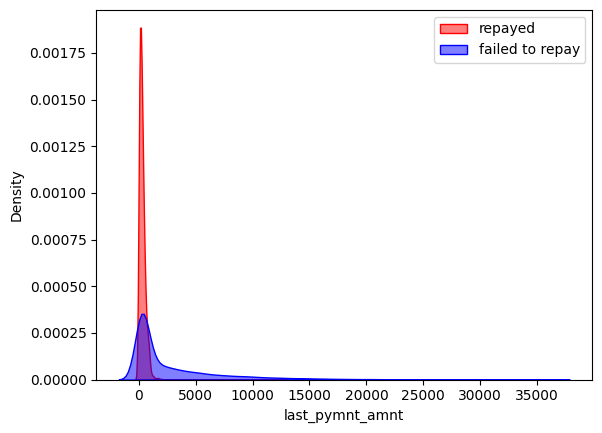

/var/folders/rm/xhgtywsd46g95m0kk2g9t5qr0000gn/T/ipykernel_18989/3799034850.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data= df1, x=col, color='red', alpha=0.5, common_grid = True, fill = True)
/var/folders/rm/xhgtywsd46g95m0kk2g9t5qr0000gn/T/ipykernel_18989/3799034850.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df2, x=col, color='blue', alpha=0.5, common_grid = True, fill = True)


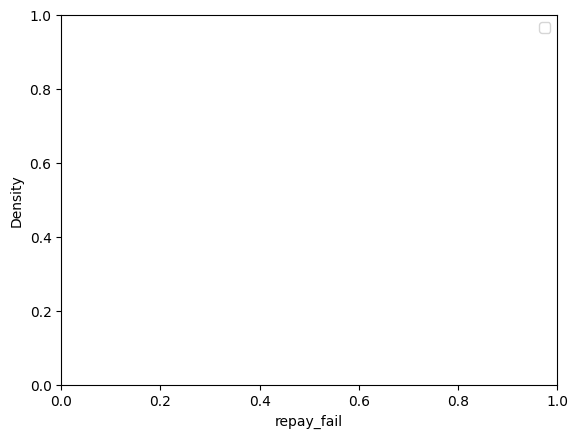

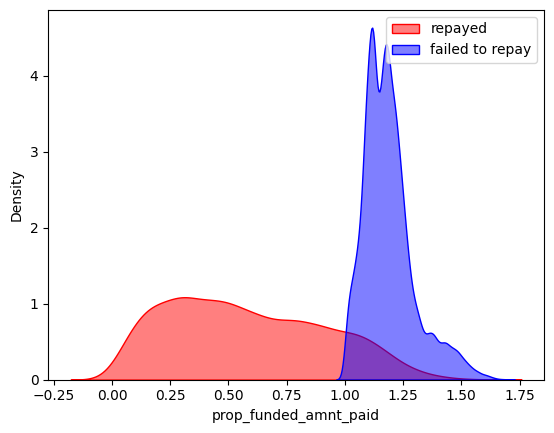

In [270]:
for i in numeric_cols:
    kdeplot_vs_repay(i, data_repay_fail.query('annual_inc < 650000'), data_repayed.query('annual_inc < 650000'))

In [100]:
data_repayed.delinq_2yrs.value_counts(normalize=True)

delinq_2yrs
0.0     0.891761
1.0     0.082757
2.0     0.016998
3.0     0.005697
4.0     0.001470
5.0     0.000704
6.0     0.000337
7.0     0.000153
11.0    0.000061
9.0     0.000031
8.0     0.000031
Name: proportion, dtype: float64

In [99]:
data_repay_fail.delinq_2yrs.value_counts(normalize=True)

delinq_2yrs
0.0    0.872340
1.0    0.092999
2.0    0.024880
3.0    0.006520
4.0    0.002402
5.0    0.000515
6.0    0.000343
Name: proportion, dtype: float64

In [143]:
x = data_repay_fail.loan_amnt - data_repay_fail.funded_amnt
x.value_counts(normalize=True)

0.0       0.944235
5000.0    0.000858
5475.0    0.000686
3200.0    0.000686
5825.0    0.000686
            ...   
9075.0    0.000172
3025.0    0.000172
7150.0    0.000172
5100.0    0.000172
4775.0    0.000172
Name: proportion, Length: 227, dtype: float64

In [144]:
x = data_repayed.loan_amnt - data_repayed.funded_amnt
x.value_counts(normalize=True)

0.0        0.955773
5000.0     0.000306
8000.0     0.000276
4475.0     0.000276
7050.0     0.000245
             ...   
18925.0    0.000031
8275.0     0.000031
19350.0    0.000031
21025.0    0.000031
12925.0    0.000031
Name: proportion, Length: 475, dtype: float64

### Initial Observations:

- Look at annual income seperatately, but there are obvious observations that could be made here.
- Look more at dti, could be something to segment further on.
- Delinq_2yrs is NOT different between repayment vs not repayed. Might look different when segmented further.
- Look more closely at inq_last_6mnths
- When does repay normally fail in terms of proportion of loan paid?
- Looks like ~95% of people who default and people who don't get loans for the amount requested.

In [145]:
data_repay_fail.annual_inc.describe()

count    5.827000e+03
mean     6.321328e+04
std      4.840245e+04
min      2.000000e+03
25%      3.720000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [146]:
data_repayed.annual_inc.describe()

count    3.265000e+04
mean     7.002933e+04
std      6.688832e+04
min      1.896000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

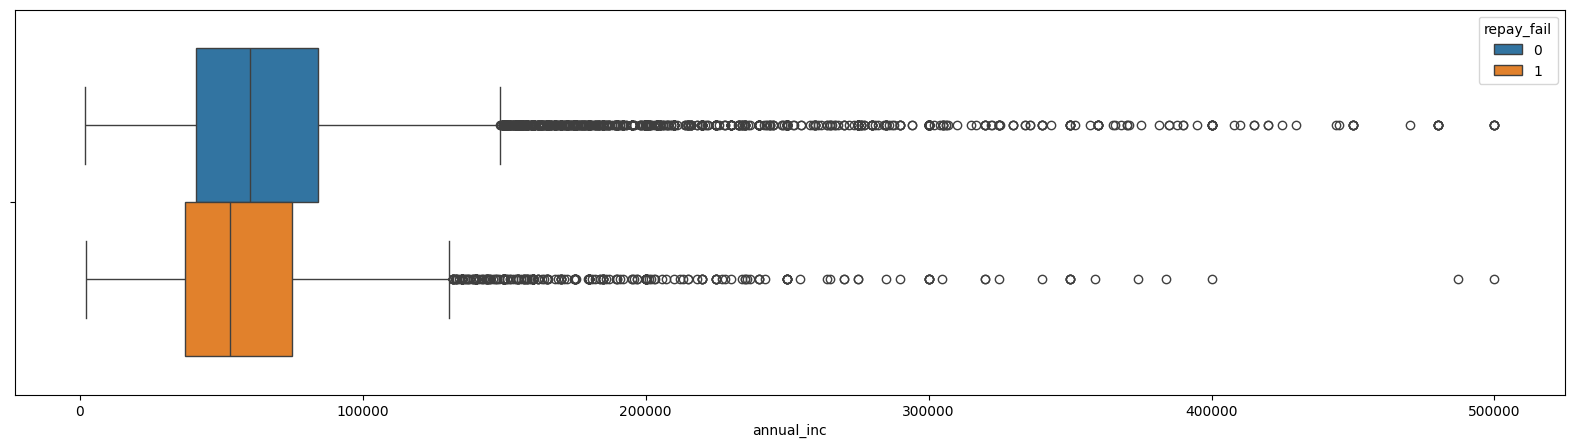

In [264]:
plt.figure(figsize = [20,5])
sns.boxplot(x="annual_inc", hue="repay_fail", data=df_wrangled.query('annual_inc <= 500000'));

Observation: The IQR for annual income of people who repay their loans vs fail to repay their loans is actually very similar. The biggest difference is that people who repay their loans 1) have more outliers and 2) have more larger outliers.

Let's compare interest rates & loan amounts of people in each section.

In [191]:
# df_wrangled annnual_inc quartiles
annual_inc_Q1 = df_wrangled.annual_inc.quantile(.25)
annual_inc_Q2 = df_wrangled.annual_inc.quantile(.5)
annual_inc_Q3 = df_wrangled.annual_inc.quantile(.75)

Text(0.5, 0.98, 'Repay Fail')

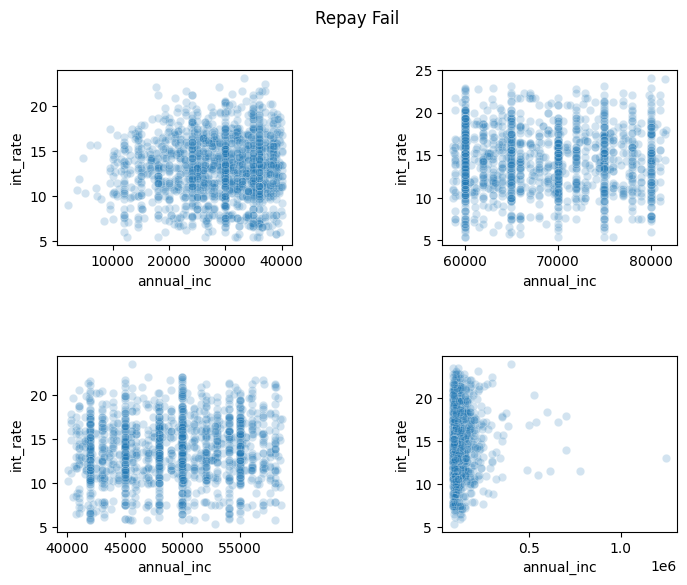

In [261]:
#plotting annual_inc against int_rate for repay_failed loans
plt.figure(figsize = [8, 6])
plt.subplot2grid((5,5), (0, 0), colspan = 2, rowspan = 2)
sns.scatterplot(x = 'annual_inc', y = 'int_rate', alpha = 0.2,
                data = data_repay_fail.query('annual_inc < @annual_inc_Q1'))
plt.subplot2grid((5,5), (3, 0), colspan = 2, rowspan = 2)
sns.scatterplot(x = 'annual_inc', y = 'int_rate',alpha = 0.2,
                data = data_repay_fail.query('annual_inc > @annual_inc_Q1 & annual_inc < @annual_inc_Q2'))
plt.subplot2grid((5,5), (0, 3), colspan = 2, rowspan = 2)
sns.scatterplot(x = 'annual_inc', y = 'int_rate',alpha = 0.2,
                data = data_repay_fail.query('annual_inc > @annual_inc_Q2 & annual_inc < @annual_inc_Q3'))

plt.subplot2grid((5,5), (3, 3), colspan = 2, rowspan = 2)
sns.scatterplot(x = 'annual_inc', y = 'int_rate',alpha = 0.2,
                data = data_repay_fail.query('annual_inc >  @annual_inc_Q3'))
plt.suptitle("Repay Fail")

In [ ]:
df_wrangled['annual_inc_bins'] = pd.cut(df_wrangled['annual_inc'], bins = 10

Text(0.5, 0.98, 'Repayed')

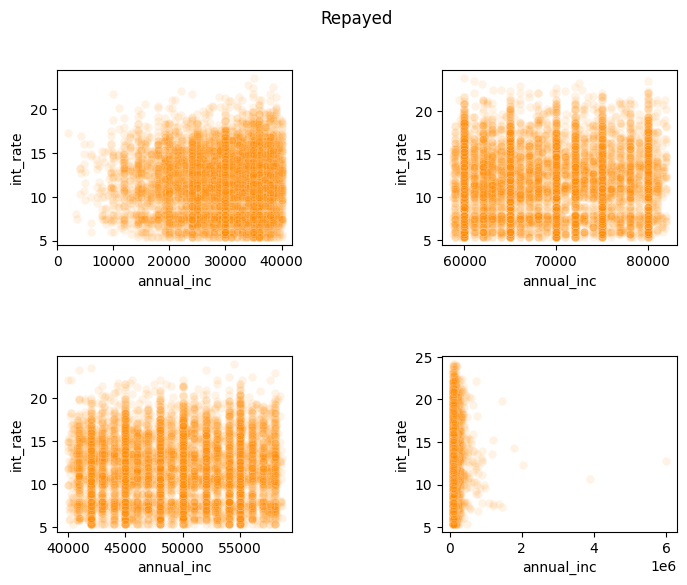

In [289]:
#plotting annual_inc against int_rate for repayed loans
plt.figure(figsize = [8, 6])
plt.subplot2grid((5,5), (0, 0), colspan = 2, rowspan = 2)
sns.scatterplot(x = 'annual_inc', y = 'int_rate', color = 'darkorange', alpha = 0.1,
                data = data_repayed.query('annual_inc < @annual_inc_Q1'))
plt.subplot2grid((5,5), (3, 0), colspan = 2, rowspan = 2)
sns.scatterplot(x = 'annual_inc', y = 'int_rate', color = 'darkorange', alpha = 0.1,
                data = data_repayed.query('annual_inc > @annual_inc_Q1 & annual_inc < @annual_inc_Q2'))
plt.subplot2grid((5,5), (0, 3), colspan = 2, rowspan = 2)
sns.scatterplot(x = 'annual_inc', y = 'int_rate', color = 'darkorange', alpha = 0.1,
                data = data_repayed.query('annual_inc > @annual_inc_Q2 & annual_inc < @annual_inc_Q3'))

plt.subplot2grid((5,5), (3, 3), colspan = 2, rowspan = 2)
sns.scatterplot(x = 'annual_inc', y = 'int_rate', color = 'darkorange', alpha = 0.1,
                data = data_repayed.query('annual_inc > @annual_inc_Q3'))
plt.suptitle("Repayed")

In [178]:
df_wrangled.annual_inc.describe()

count    3.847700e+04
mean     6.899710e+04
std      6.447627e+04
min      1.896000e+03
25%      4.000000e+04
50%      5.865000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [179]:
data_repay_fail.annual_inc.describe()

count    5.827000e+03
mean     6.321328e+04
std      4.840245e+04
min      2.000000e+03
25%      3.720000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [180]:
data_repayed.annual_inc.describe()

count    3.265000e+04
mean     7.002933e+04
std      6.688832e+04
min      1.896000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Looks like it doesn't matter what the annual income is, the interest rate could be super high or super low regardless.

Oooh I want to look at dti vs int rate

In [240]:
df_wrangled.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail,prop_funded_amnt_paid
1,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,Aug-05,5.0,NaN,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0,1.230117
2,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,Apr-94,1.0,59.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1,0.589752
3,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Sep-11,Fully Paid,other,751xx,TX,10.80,3.0,Mar-98,3.0,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0,1.154627
4,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,Jan-75,0.0,72.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0,1.080832
5,506439,652909,3600.0,3600.0,3600.0,36 months,10.25,116.59,10+ years,MORTGAGE,675048.0,Not Verified,Apr-10,Does not meet the credit policy. Status:Fully ...,other,352xx,AL,1.55,0.0,Apr-98,4.0,25.0,8.0,0.0,0.0,0%,25.0,4206.031191,4206.03,3600.00,606.03,May-13,146.75,Jun-13,Jun-16,0,1.168342


In [243]:
df_wrangled.funded_amnt[1] / df_wrangled.annual_inc[1]

0.1249750049990002

In [245]:
(df_wrangled.annual_inc[1] / 12 ) / df_wrangled.installment[1]

19.515335986888317

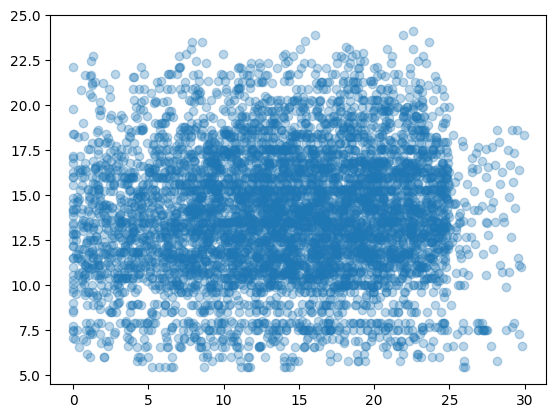

In [259]:
plt.scatter(x='dti', y='int_rate', data=data_repay_fail, alpha = 0.3)

In [271]:
df_wrangled.repay_fail.value_counts(normalize=True)

repay_fail
0    0.848537
1    0.151463
Name: proportion, dtype: float64

In [283]:
inds = df_wrangled['annual_inc'] >= 125000
df_wrangled[inds].repay_fail.value_counts(normalize=True)

repay_fail
0    0.880092
1    0.119908
Name: proportion, dtype: float64

In [297]:
df_wrangled.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
emp_length                  993
home_ownership                0
annual_inc                    1
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    24362
open_acc                      0
pub_rec                       0
revol_bal                     3
revol_util                   59
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
last_pym

In [301]:
df_wrangled.int_rate.nunique()

390

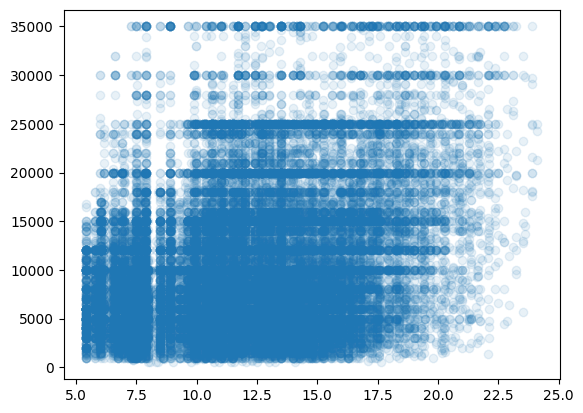

In [299]:
plt.scatter(data=df_wrangled, x='int_rate', y='funded_amnt', alpha=0.1)
#bin interest rates and plot box plots

In [ ]:
for each interest rate, get average loan_amnt and plot average line plot

In [309]:
int_vs_funded=df_wrangled.groupby(by='int_rate').aggregate({'funded_amnt': 'mean'})

<Axes: xlabel='int_rate', ylabel='funded_amnt'>

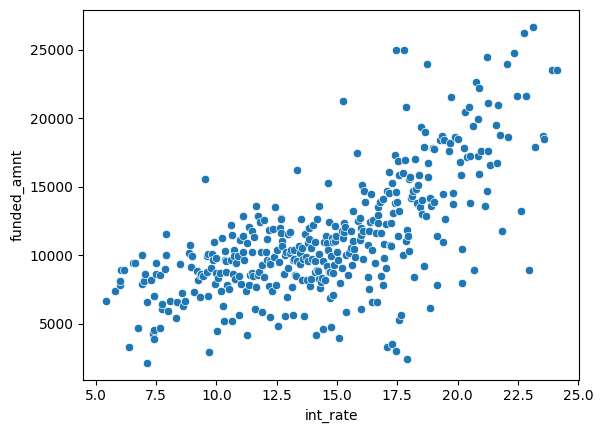

In [393]:
sns.scatterplot(data=int_vs_funded, x = 'int_rate', y='funded_amnt')

In [338]:
int_rate_and_purpose_vs_funded=df_wrangled.groupby(by=['int_rate', 'purpose']).aggregate({'funded_amnt': 'mean'})

In [358]:
from collections import deque 
  
def split_list(input_list, chunk_size): 
  # Create a deque object from the input list 
  deque_obj = deque(input_list) 
  # While the deque object is not empty 
  while deque_obj: 
      # Pop chunk_size elements from the left side of the deque object 
      # and append them to the chunk list 
      chunk = [] 
      for _ in range(chunk_size): 
        if deque_obj: 
          chunk.append(deque_obj.popleft()) 
          
      # Yield the chunk 
      yield chunk 
input_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
chunk_size = 3
chunks = list(split_list(input_list, chunk_size)) 

In [405]:
chunks = list(split_list(purposes, 1))

In [397]:
chunks

[['other', 'debt_consolidation', 'credit_card', 'small_business'],
 ['major_purchase', 'wedding', 'medical', 'car'],
 ['home_improvement', 'vacation', 'educational', 'house'],
 ['moving', 'renewable_energy']]

In [398]:
from sklearn.preprocessing import MinMaxScaler

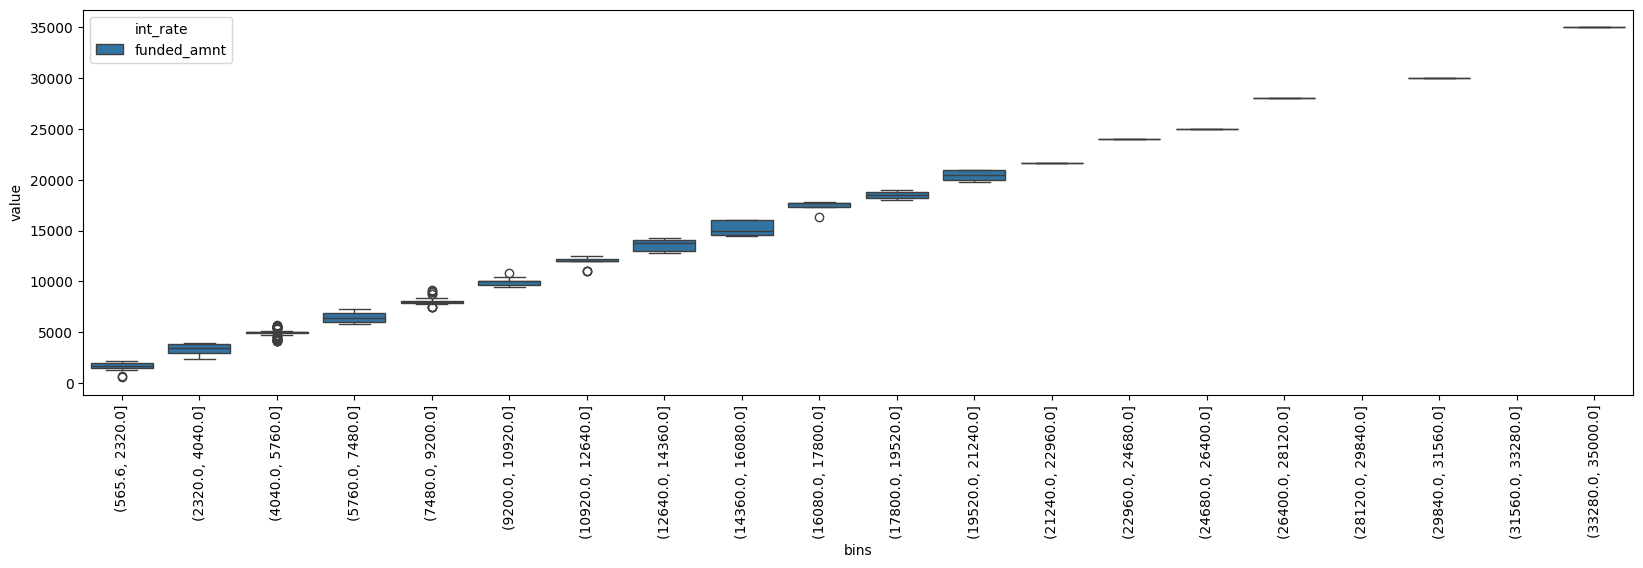

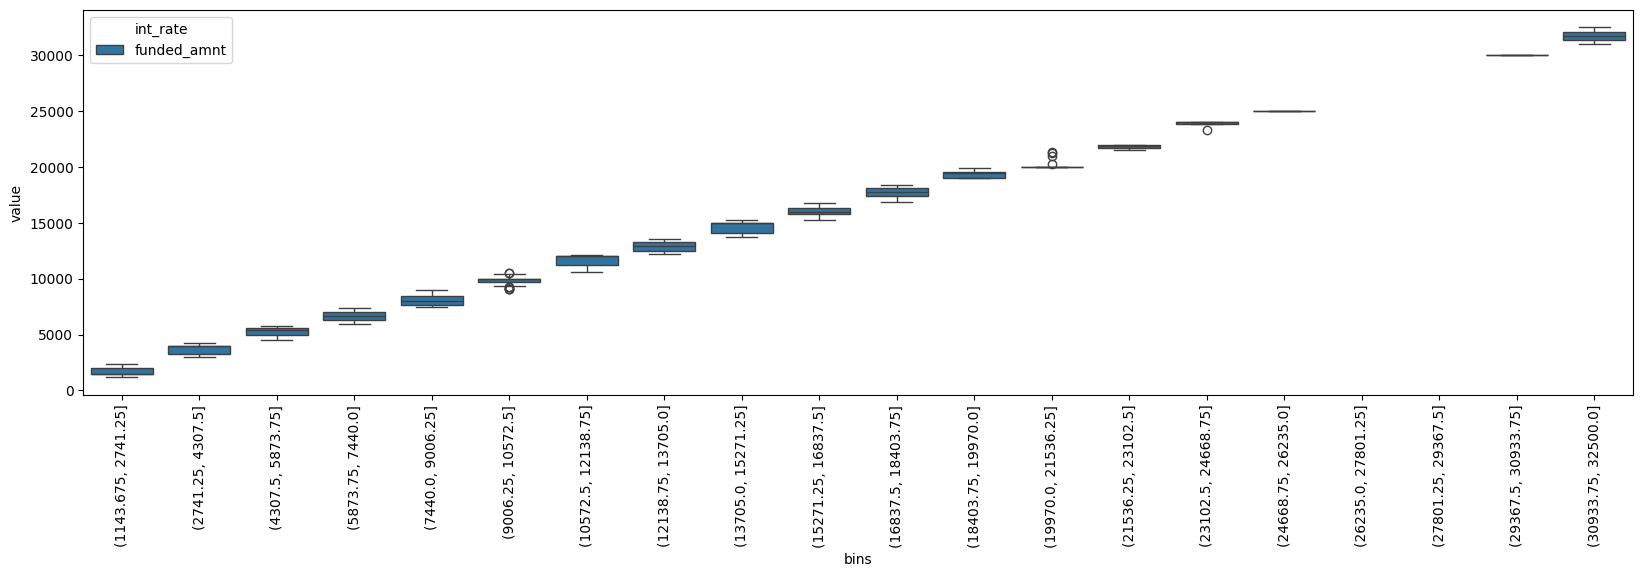

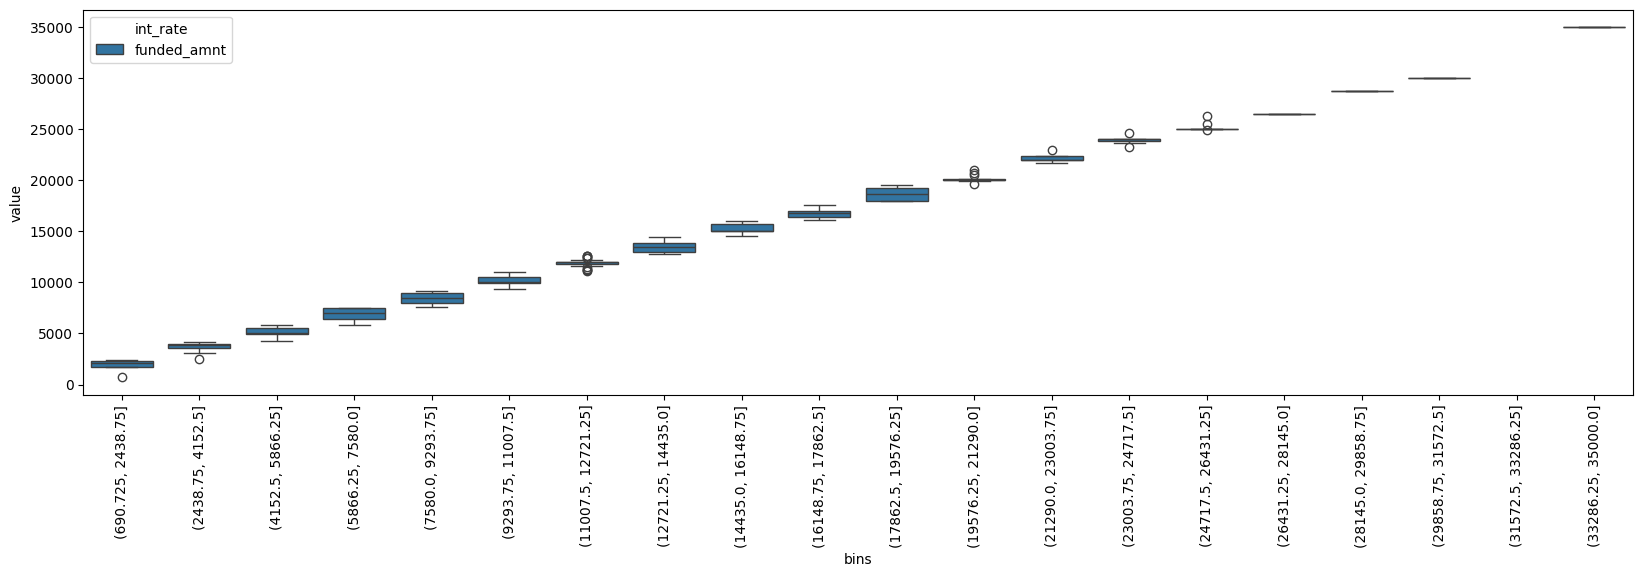

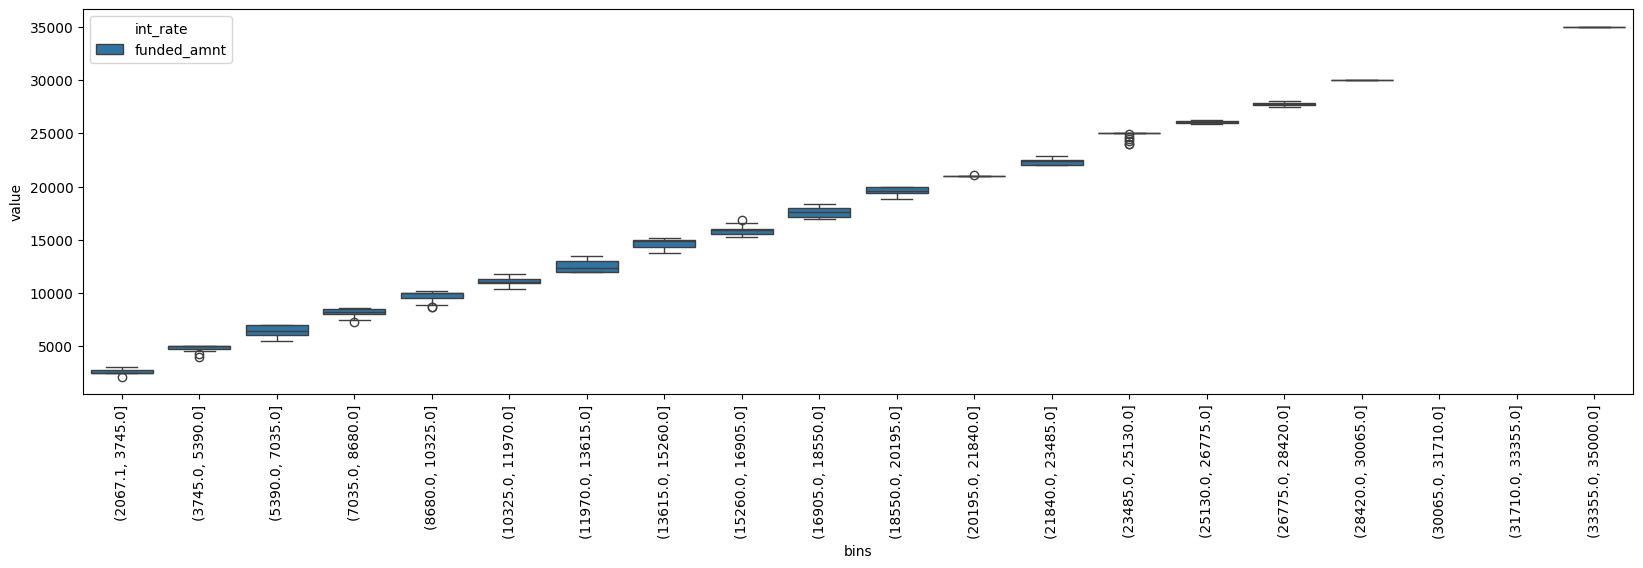

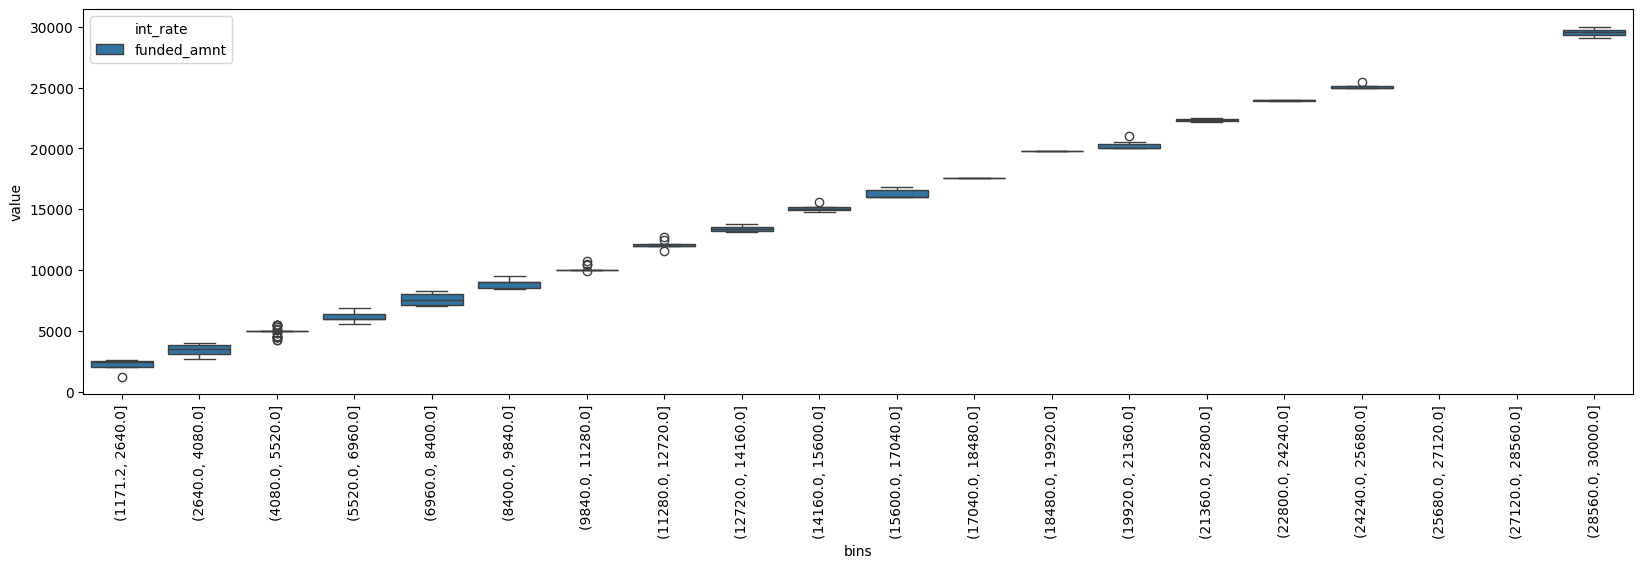

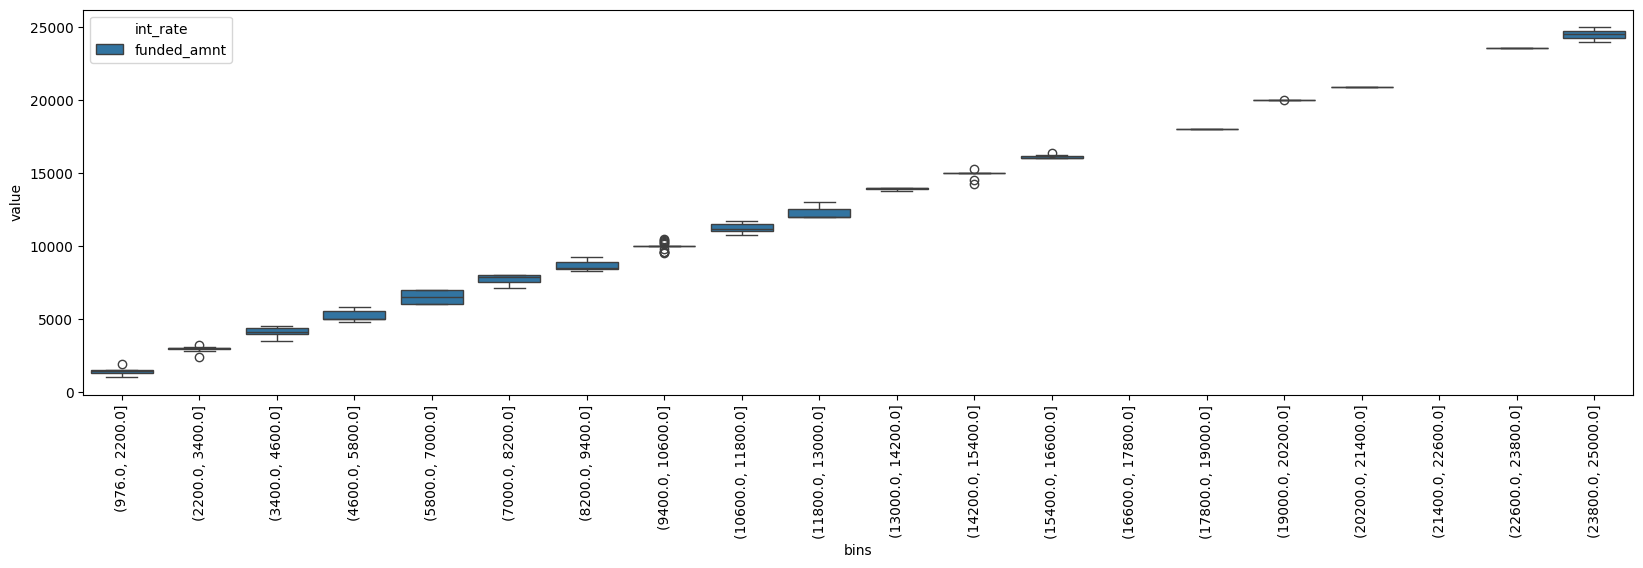

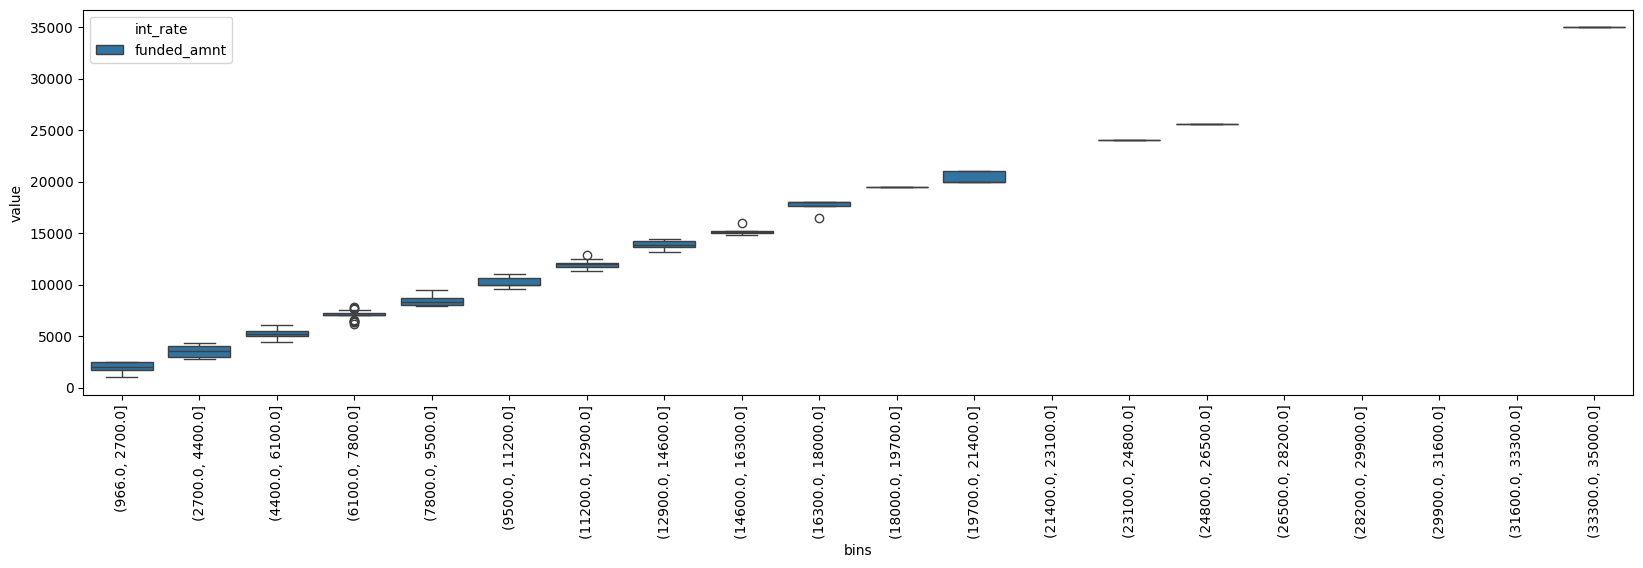

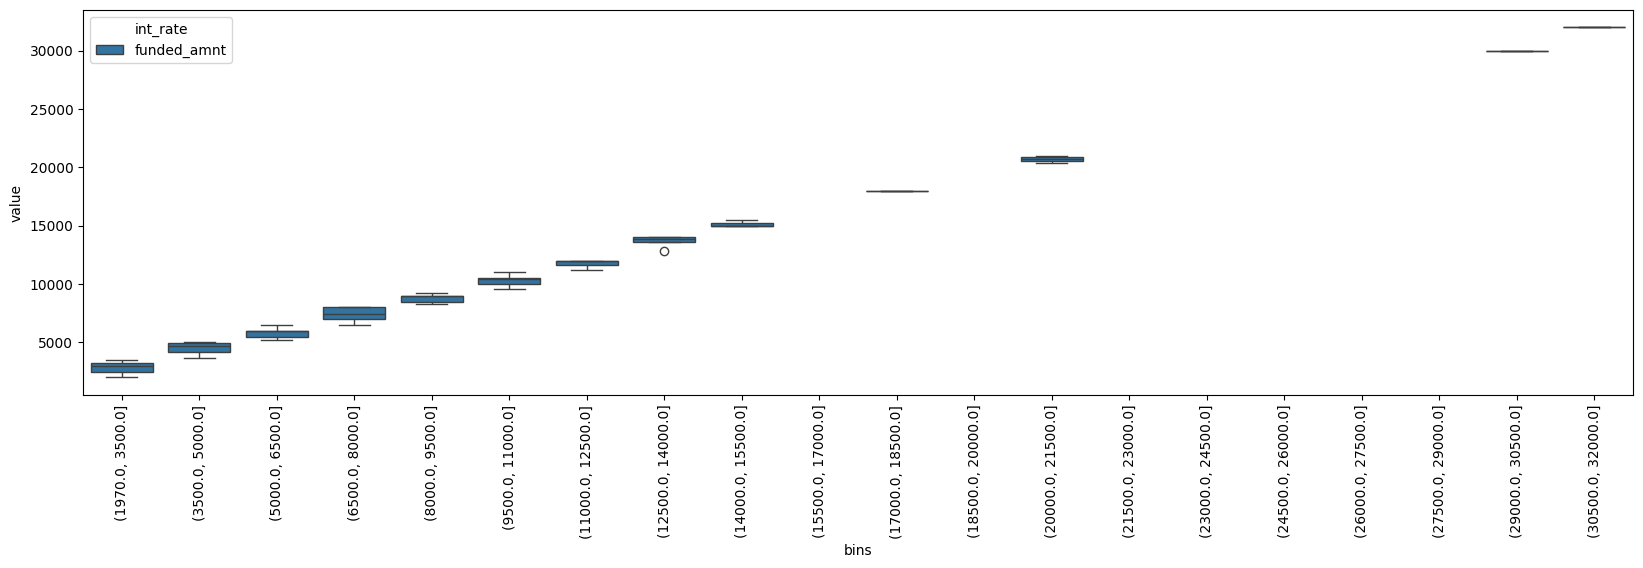

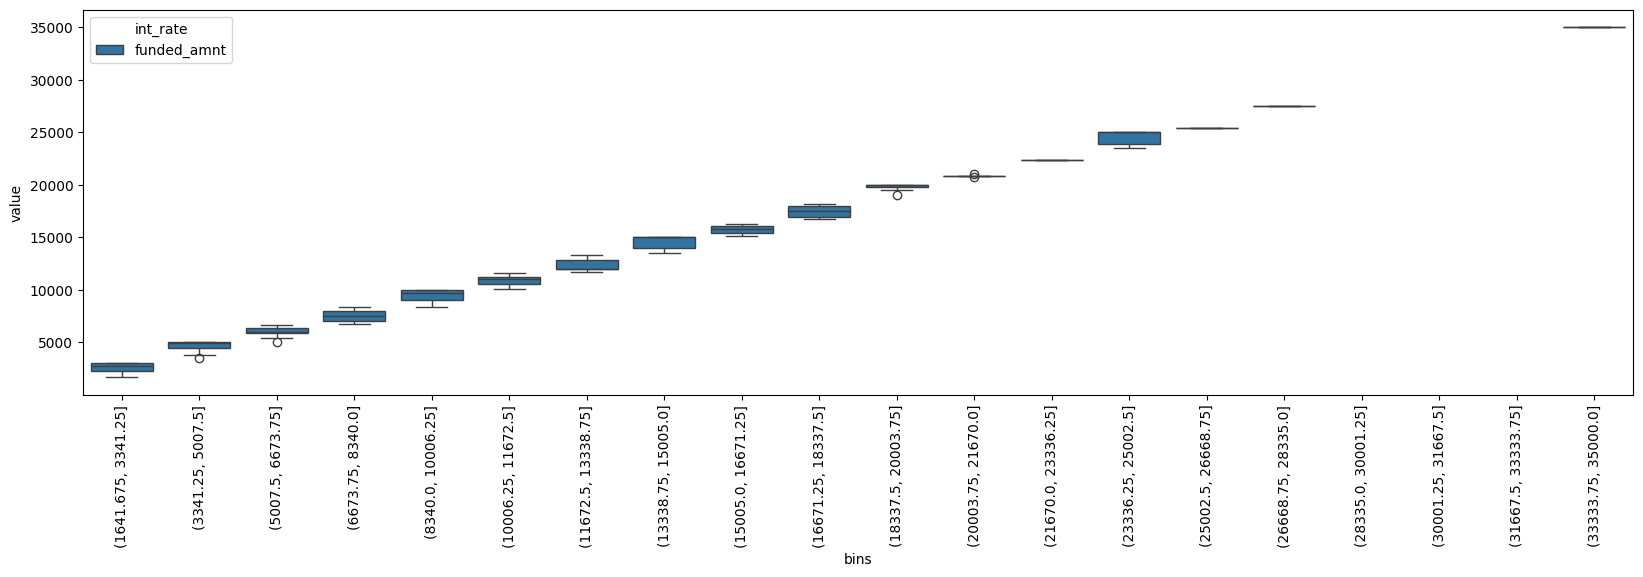

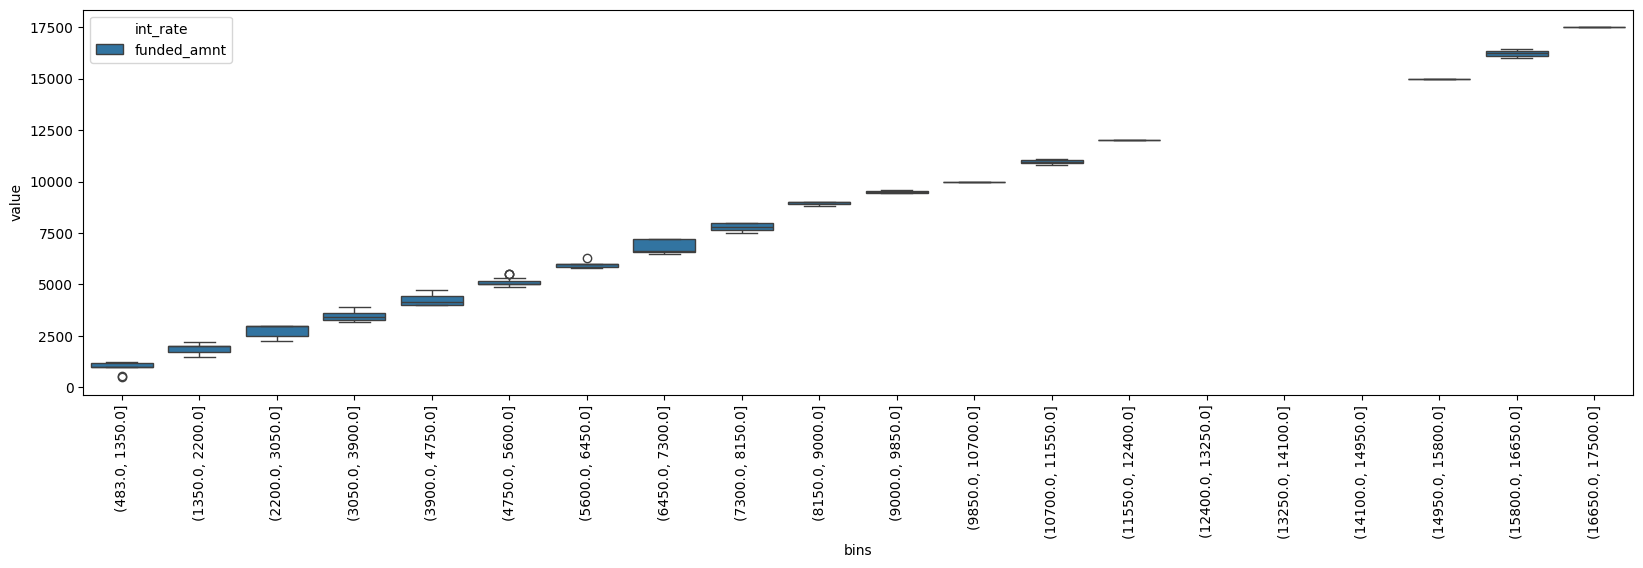

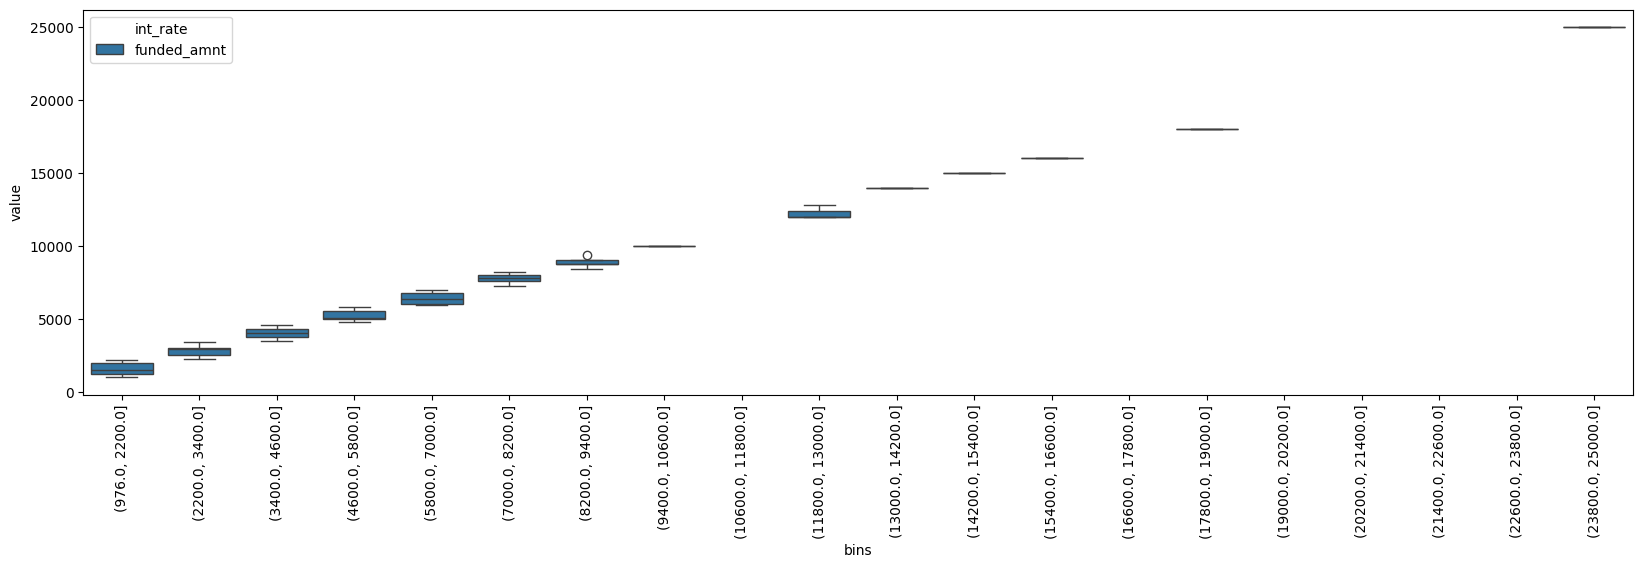

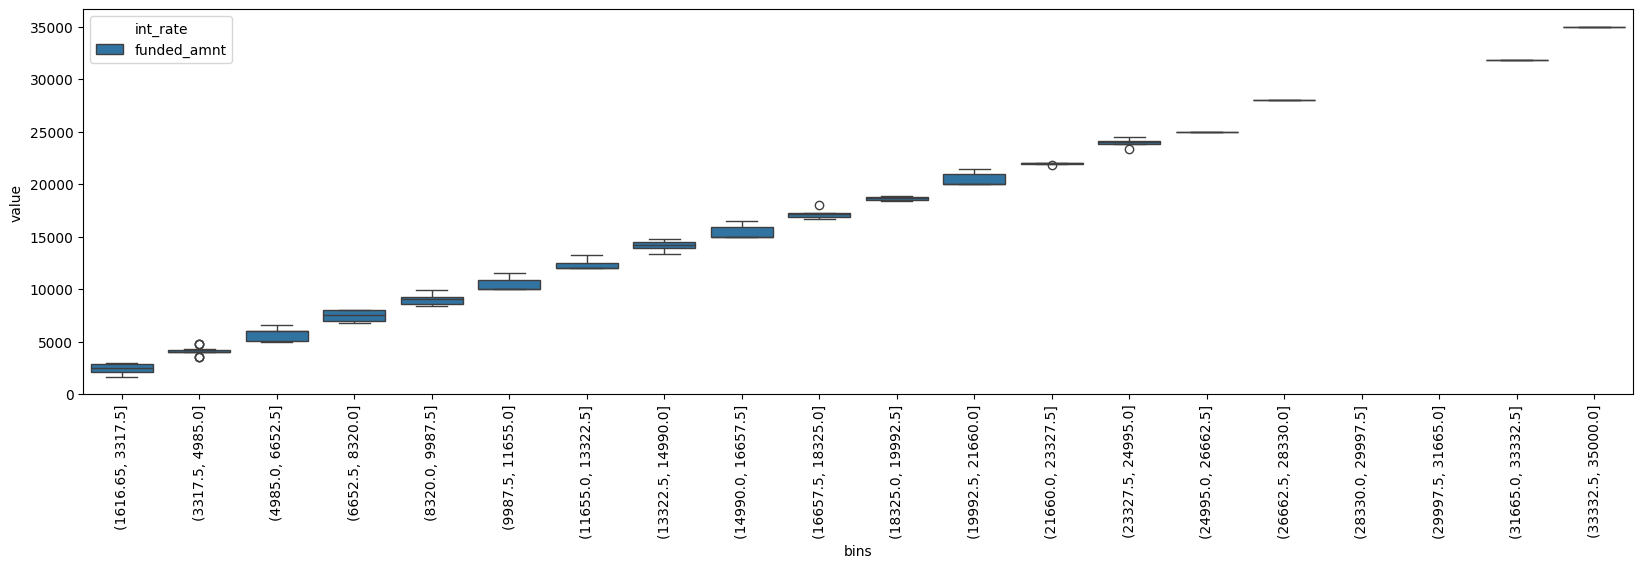

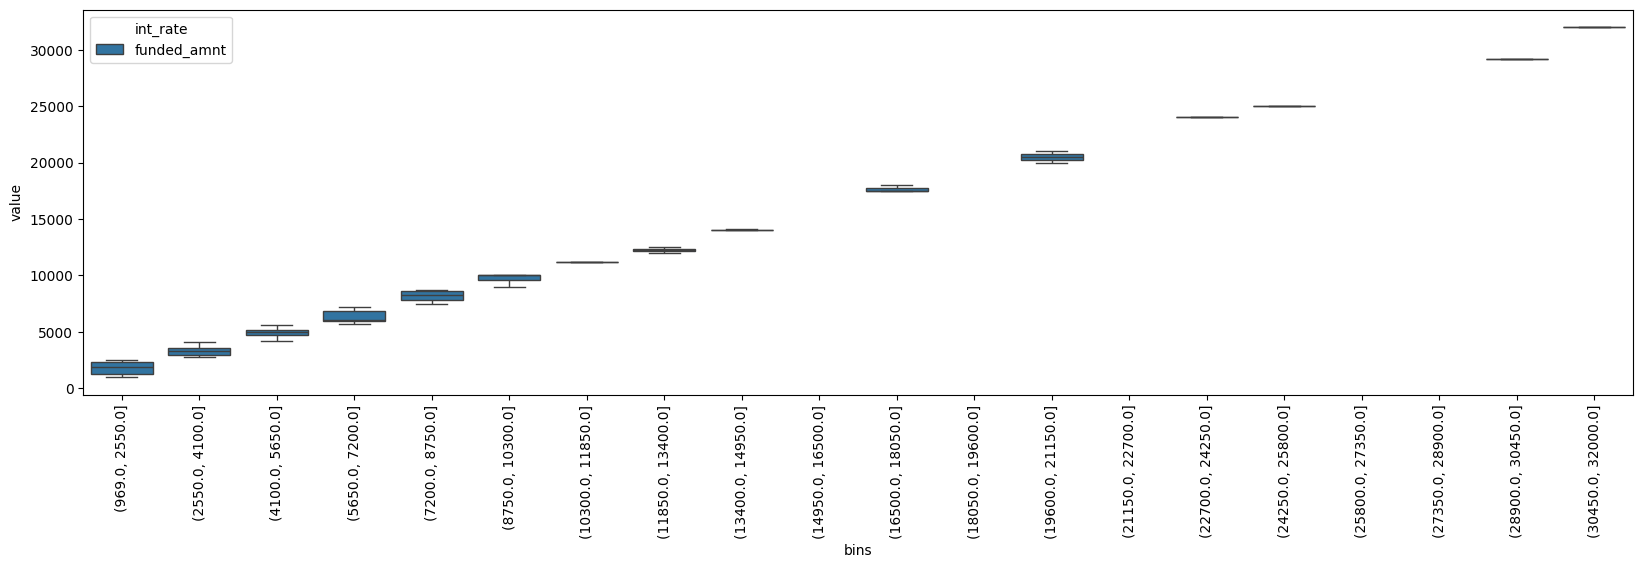

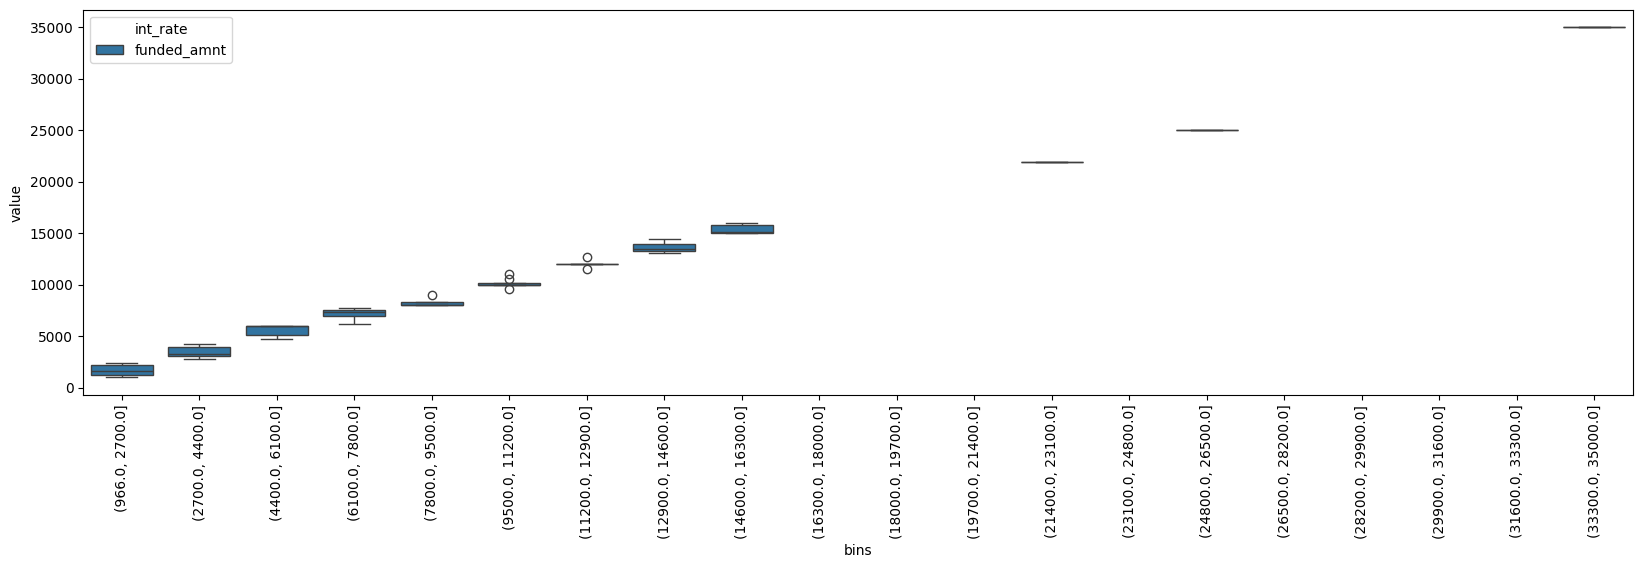

In [413]:
for chunk in chunks:
    groups = df_wrangled[df_wrangled.purpose.isin(chunk)].groupby(['int_rate', 'purpose'])
    means = groups.aggregate({'funded_amnt': 'median'})
    counts = groups.size().reset_index(name='counts')
    scaler = MinMaxScaler(feature_range=(0.1, 5))
    #means['weight'] = scaler.fit_transform(counts[['counts']])
    #sns.scatterplot(data=means, x='int_rate', y='funded_amnt', hue='purpose', sizes='weight')
    #plt.show()
    
    dlong = means.melt(var_name='int_rate', value_name='value')
    dlong['bins'] = pd.cut(dlong['value'], 20)
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.boxplot(data=dlong, x='bins', y='value', hue='int_rate', ax=ax)
    ax.tick_params(axis='x', rotation=90)
    plt.show()
    



In [ ]:
scaler = MinMaxScaler(feature_range=(0.5, 3))
df['normalized_volume'] = scaler.fit_transform(df[['volume']])
    sns.lineplot(data,
                       x='int_rate', y='funded_amnt', hue='purpose')
    plt.show()


In [ ]:
purposes = df_wrangled.purpose.unique()
int_rate_and_purpose_vs_funded.query('purpose == @purposes[:4]')
#sns.lineplot(data=int_rate_and_purpose_vs_funded.query('purpose == "major_purchase"'), x = 'int_rate', y='funded_amnt')

In [350]:
int_rate_and_purpose_vs_funded

funded_amnt
int_rate purpose                         
5.42     car                  5219.642857
         credit_card          7792.857143
         debt_consolidation   7447.641509
         home_improvement     7100.704225
         house                7700.000000
...                                   ...
23.91    debt_consolidation  24809.375000
         home_improvement    18000.000000
         other               17625.000000
24.11    credit_card         24625.000000
         debt_consolidation  21250.000000

[3146 rows x 1 columns]